## import the library

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import shap

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from datetime import datetime
from sklearn.calibration import calibration_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import brier_score_loss
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, cohen_kappa_score, brier_score_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## load to the dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0
...,...,...,...,...,...,...,...,...,...,...,...
8995,0.101630,0.400250,NaN,-0.019412,-0.063150,0.077627,0.540975,-0.169030,Above Average,Region A,0
8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,High,Region C,1
8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,High,Region C,1
8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,Low,Region B,0


## dataset

In [4]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [6]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [11]:
imputer = SimpleImputer(strategy='median')  
df[['feature_3', 'feature_6']] = imputer.fit_transform(df[['feature_3', 'feature_6']])

In [12]:
df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
category_1    0
category_2    0
target        0
dtype: int64

In [13]:
df['category_1'].value_counts()

category_1
Low              2802
High             2763
Above Average    1727
Below Average    1708
Name: count, dtype: int64

In [14]:
df['category_2'].value_counts()

category_2
Region B    3618
Region A    3551
Region C    1831
Name: count, dtype: int64

## eda

<Axes: >

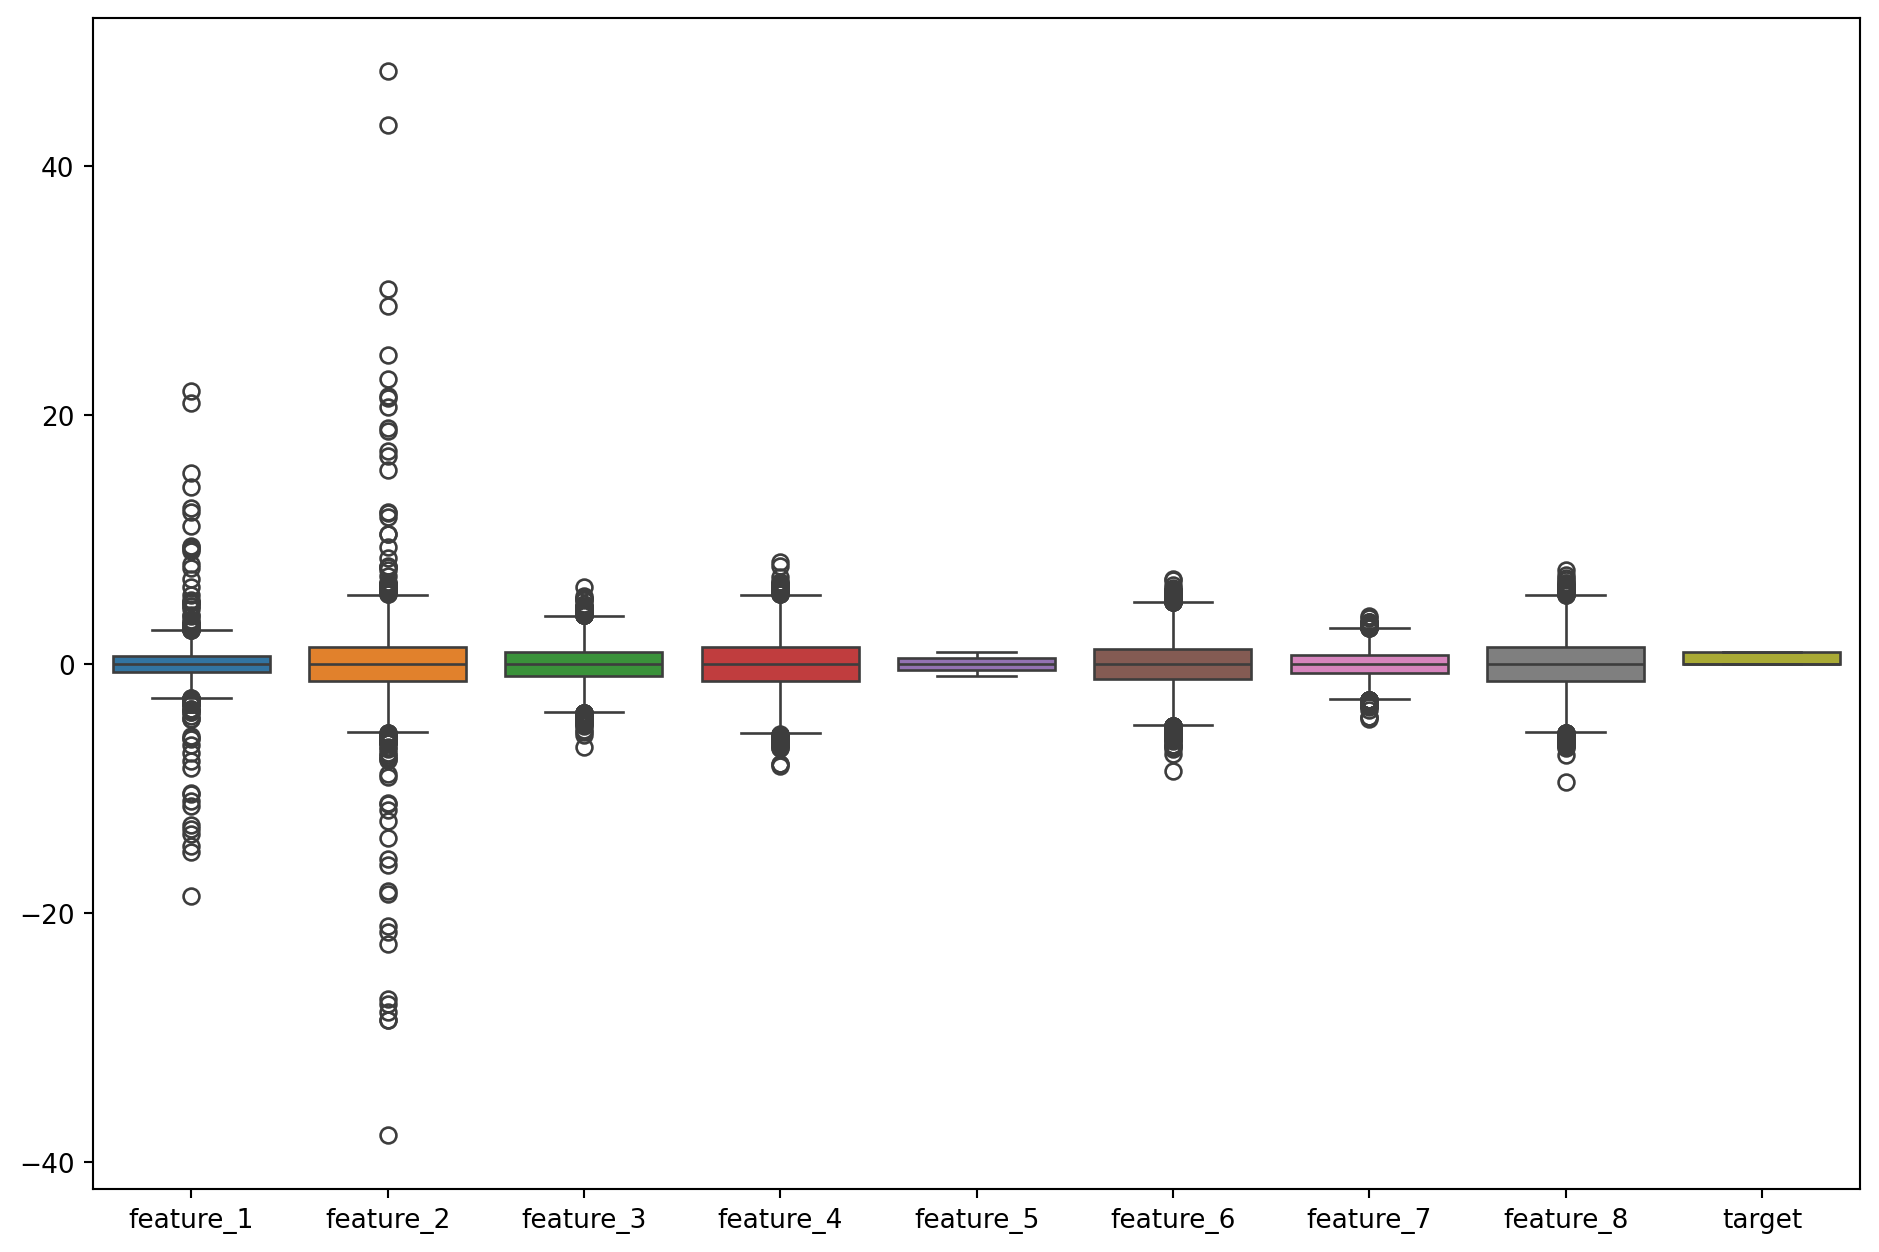

In [17]:
plt.figure(figsize=(12,8), dpi=190)
sb.boxplot(data=df)

<Axes: >

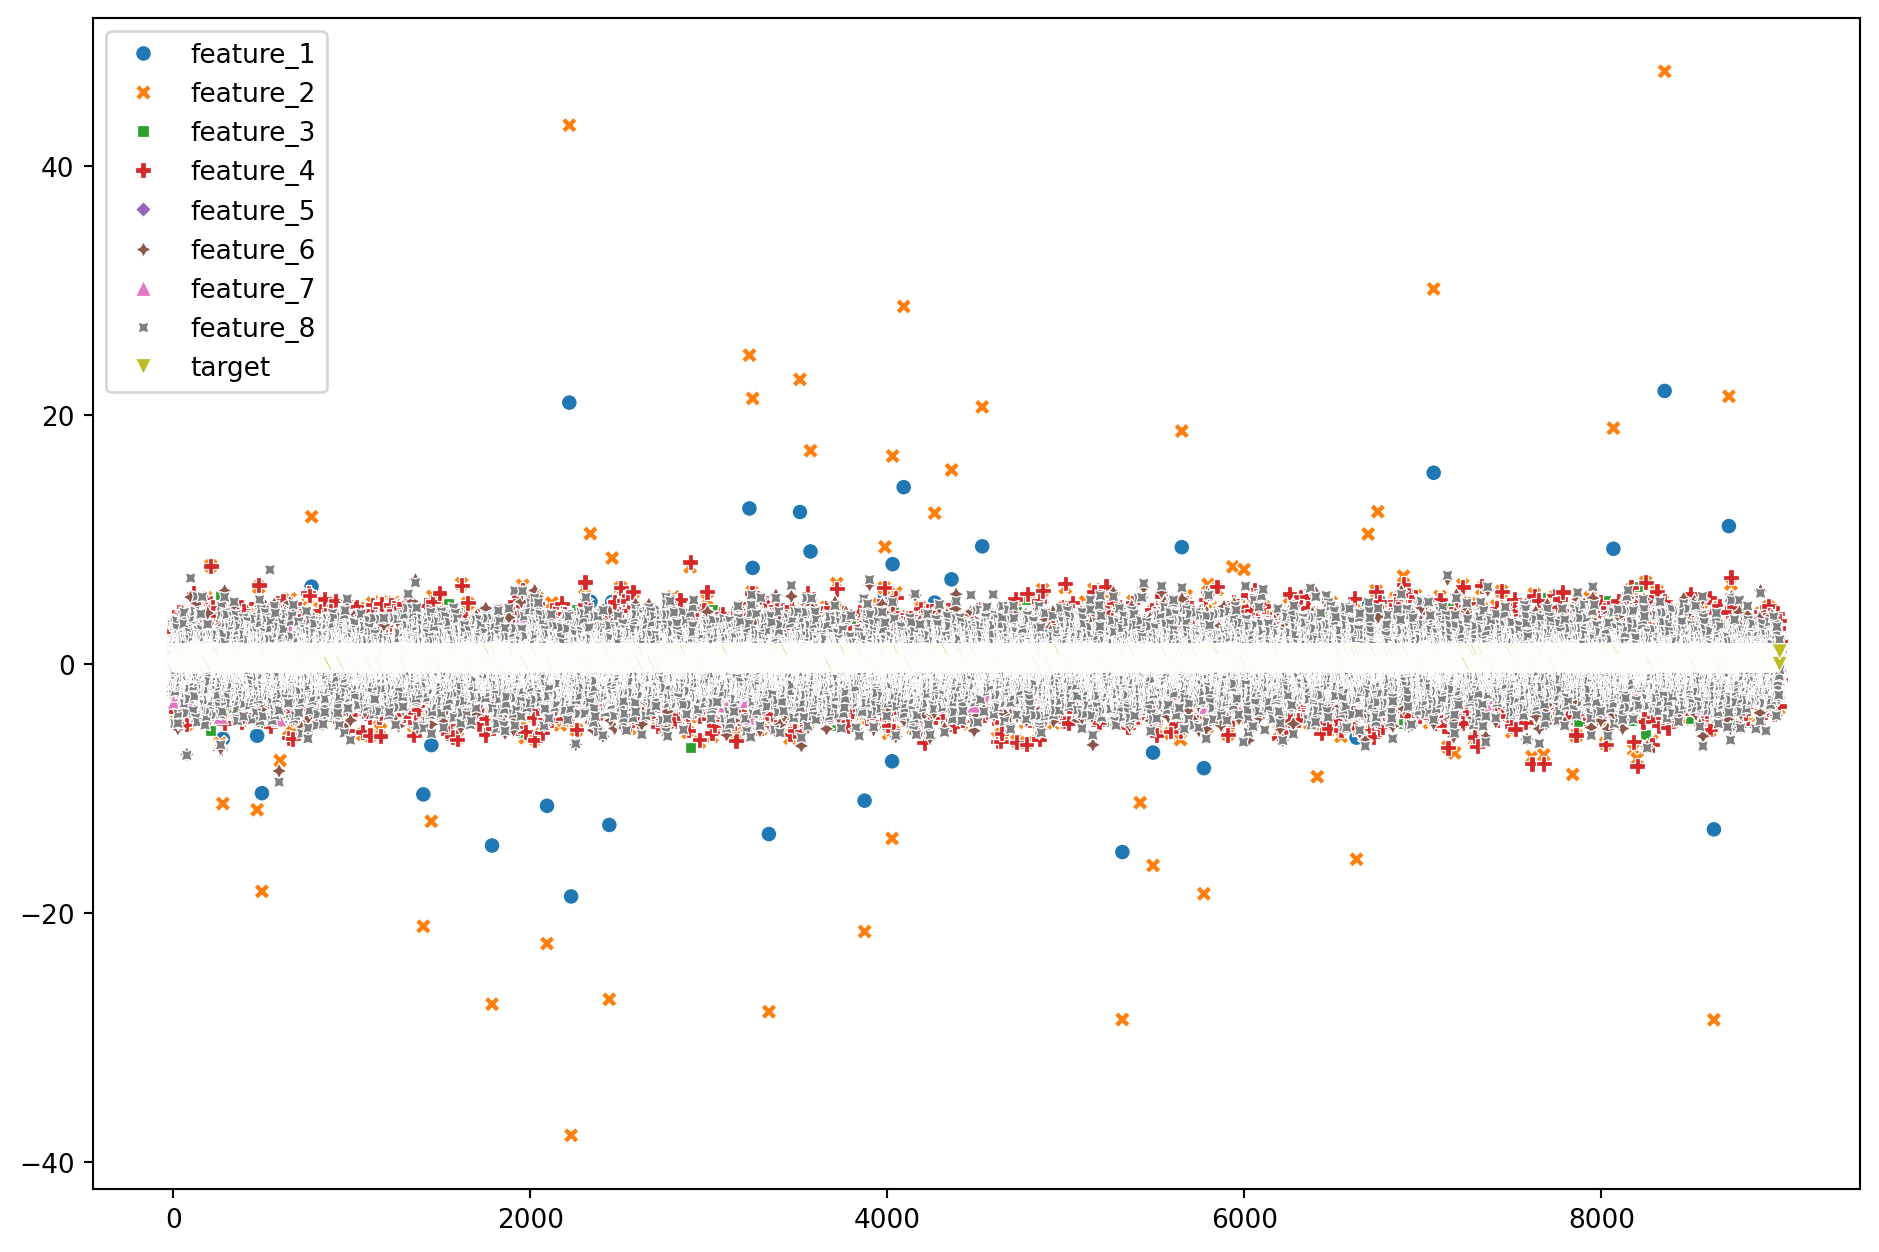

In [21]:
plt.figure(figsize=(12,8), dpi=190)
sb.scatterplot(data=df)

<Axes: xlabel='category_1', ylabel='count'>

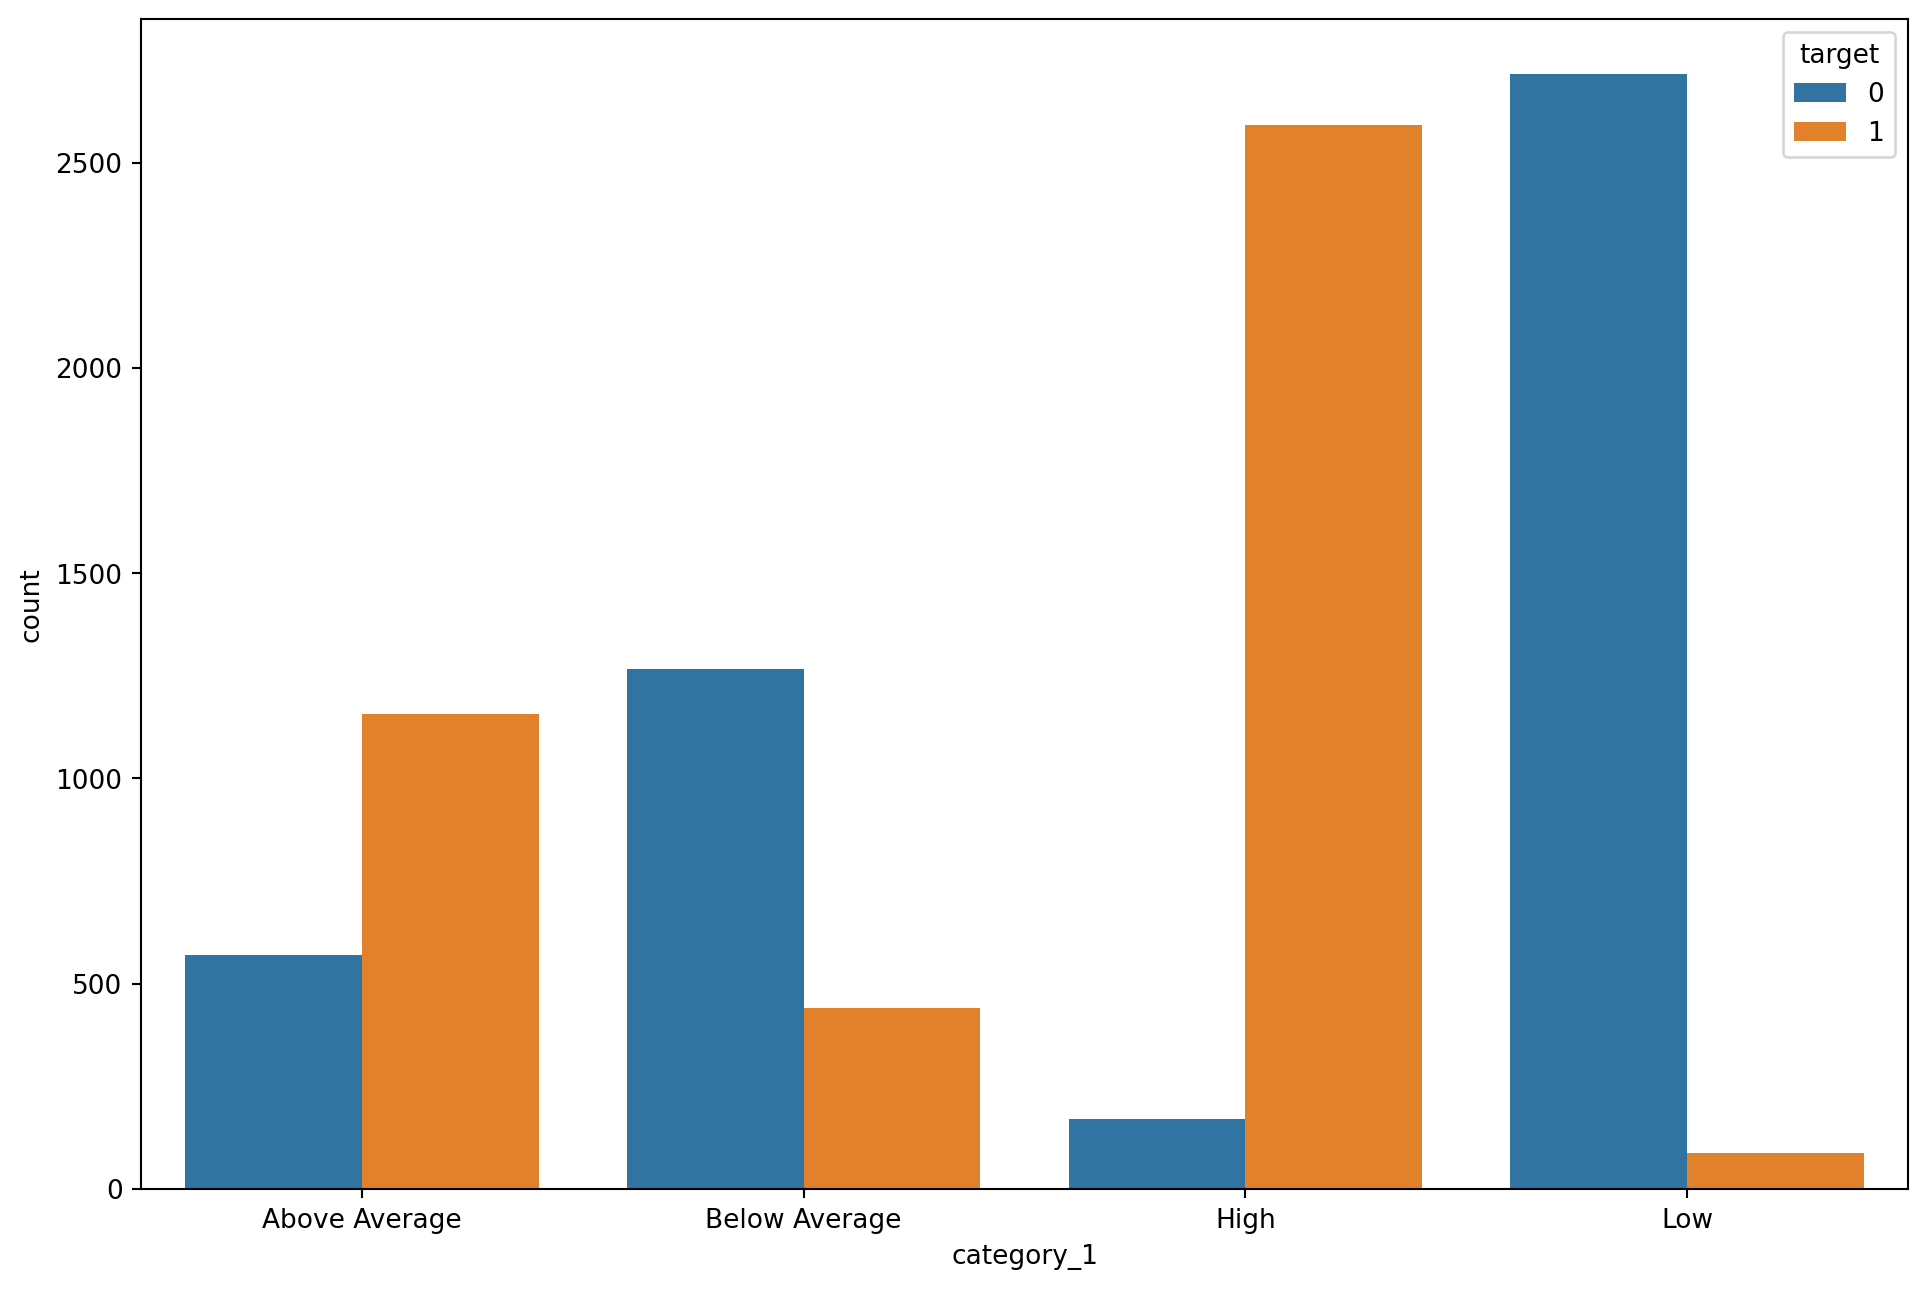

In [54]:
plt.figure(figsize=(12,8), dpi=190)
sb.countplot(data=df,x='category_1', hue='target')

<Axes: xlabel='category_2', ylabel='count'>

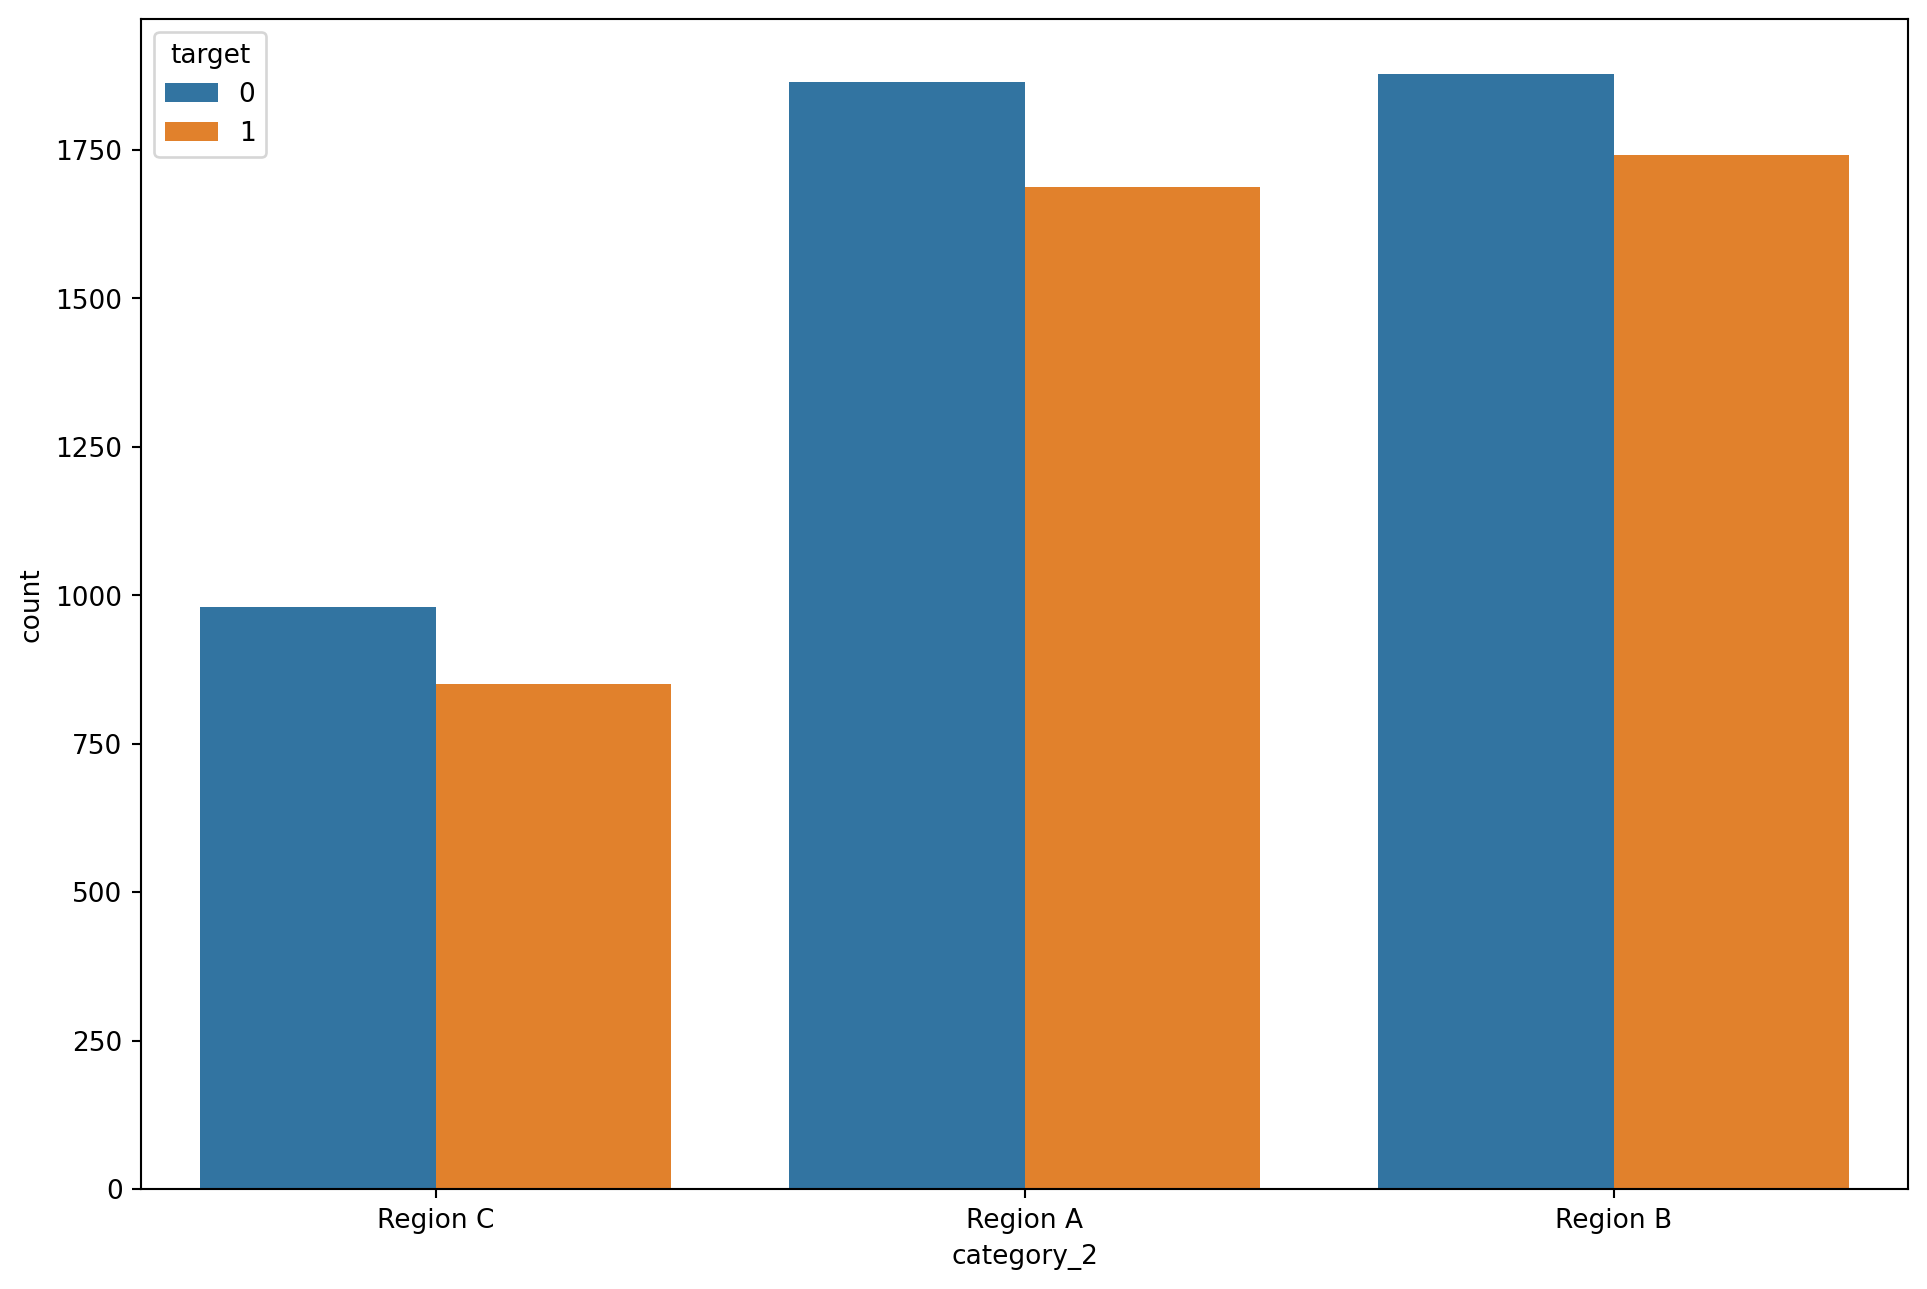

In [53]:
plt.figure(figsize=(12,8), dpi=190)
sb.countplot(data=df,x='category_2', hue='target')

#### надо закончить eda !!!!

#### data cleaning

In [34]:
Q1 = df['feature_2'].quantile(0.25)
Q3 = df['feature_2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_2'] = df['feature_2'].clip(lower_bound, upper_bound)

In [36]:
Q1 = df['feature_1'].quantile(0.25)
Q3 = df['feature_1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_1'] = df['feature_1'].clip(lower_bound, upper_bound)

In [37]:
Q1 = df['feature_3'].quantile(0.25)
Q3 = df['feature_3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_3'] = df['feature_3'].clip(lower_bound, upper_bound)

In [38]:
Q1 = df['feature_4'].quantile(0.25)
Q3 = df['feature_4'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_4'] = df['feature_4'].clip(lower_bound, upper_bound)

In [39]:
Q1 = df['feature_6'].quantile(0.25)
Q3 = df['feature_6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_6'] = df['feature_6'].clip(lower_bound, upper_bound)

In [40]:
Q1 = df['feature_7'].quantile(0.25)
Q3 = df['feature_7'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_7'] = df['feature_7'].clip(lower_bound, upper_bound)

In [41]:
Q1 = df['feature_8'].quantile(0.25)
Q3 = df['feature_8'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['feature_8'] = df['feature_8'].clip(lower_bound, upper_bound)

<Axes: >

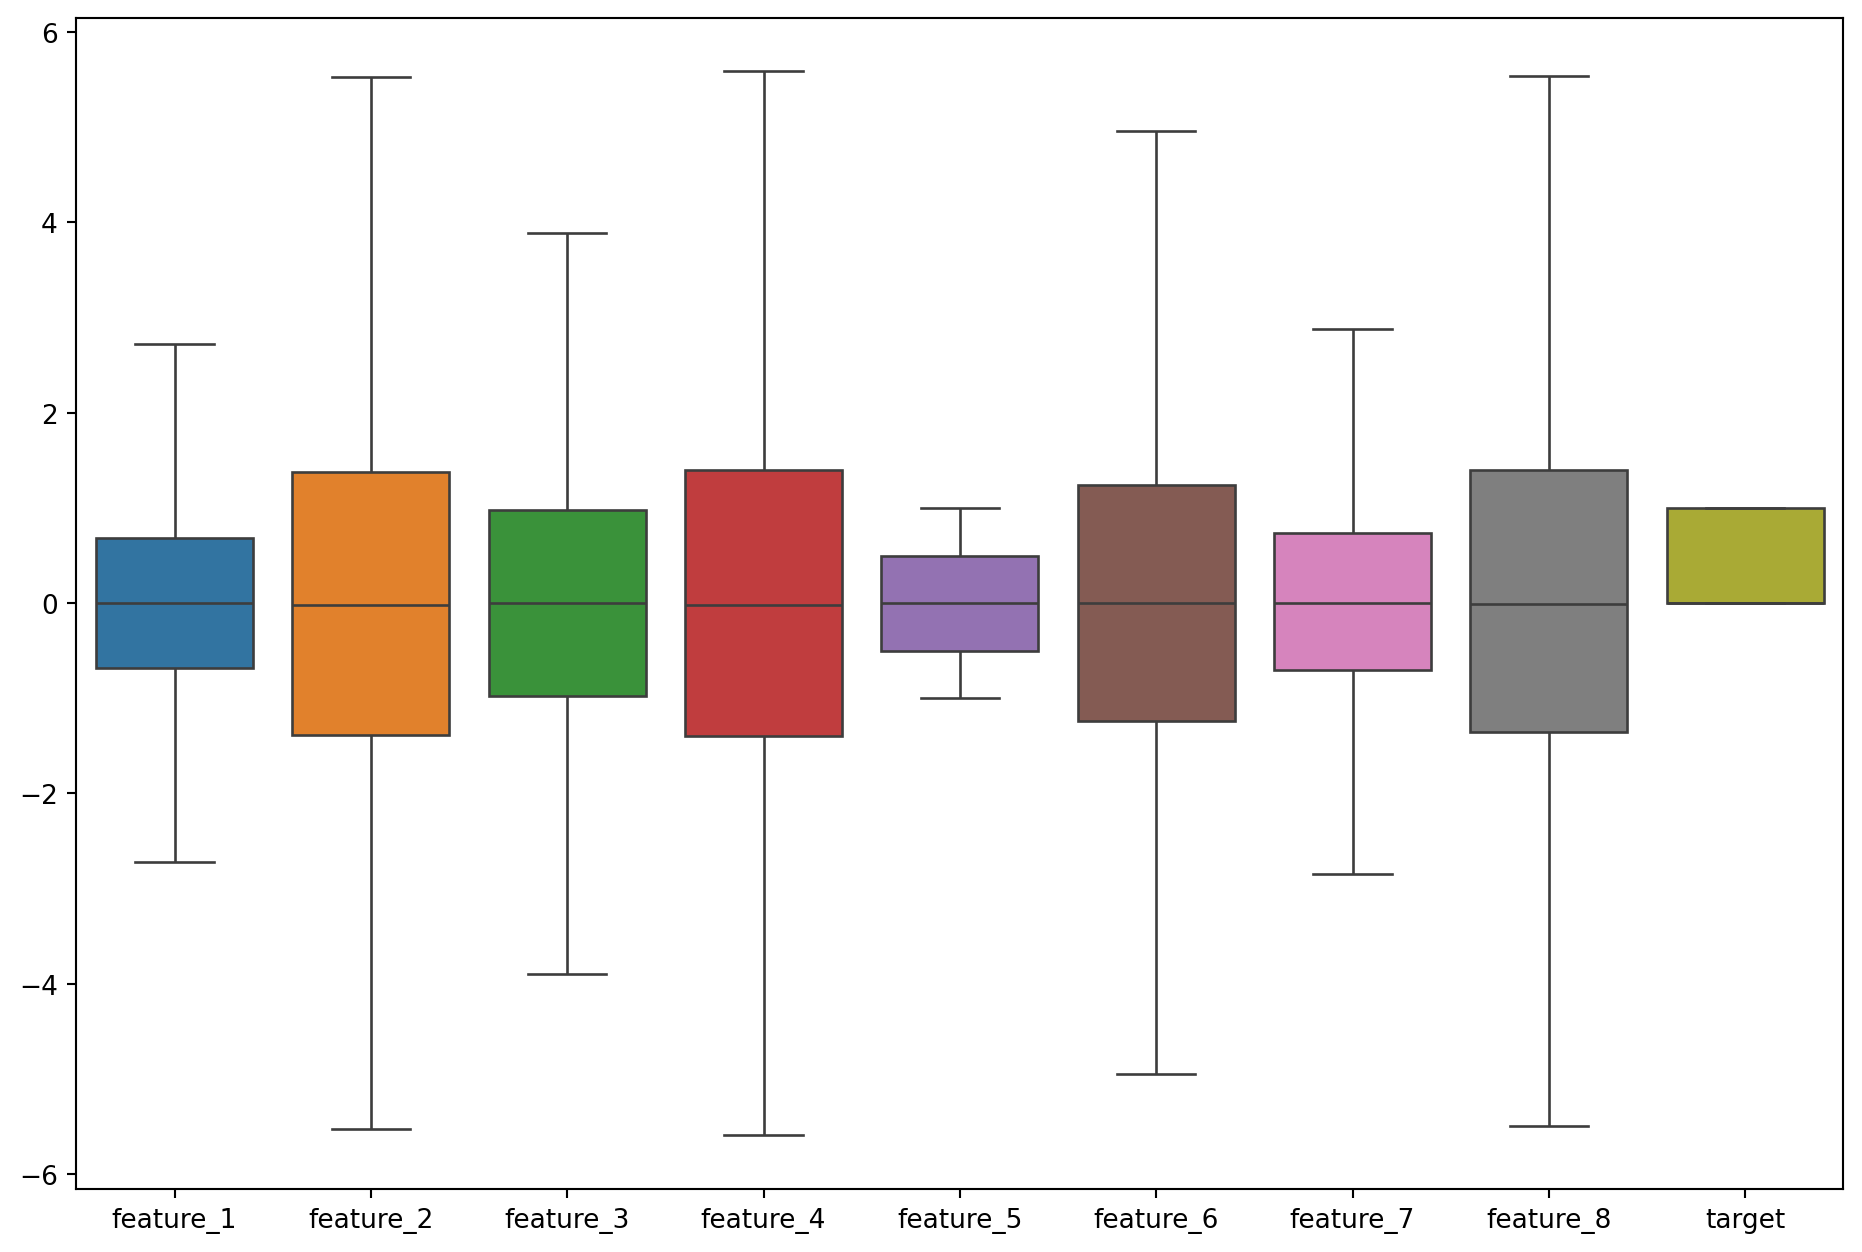

In [42]:
plt.figure(figsize=(12,8), dpi=190)
sb.boxplot(data=df)

## data preprocessing

In [43]:
df_encoded = pd.get_dummies(df, columns=['category_1', 'category_2'], drop_first=True, dtype=int)


In [44]:
df_encoded = df_encoded.rename(columns={
    'category_1_Below Average': 'Below_Average',
    'category_1_High': 'High',
    'category_1_Low': 'Low',
    'category_2_Region B': 'Region_B',
    'category_2_Region C': 'Region_C'})

In [45]:
df_encoded.skew()

feature_1        0.009027
feature_2        0.009429
feature_3       -0.001339
feature_4        0.018569
feature_5       -0.008142
feature_6       -0.025151
feature_7       -0.030700
feature_8       -0.019514
target           0.098357
Below_Average    1.582525
High             0.836997
Low              0.815042
Region_B         0.399820
Region_C         1.473593
dtype: float64

In [46]:
df_encoded.kurtosis()

feature_1       -0.064427
feature_2       -0.063458
feature_3       -0.084315
feature_4       -0.127841
feature_5       -1.204675
feature_6       -0.059066
feature_7       -0.142957
feature_8       -0.143717
target          -1.990768
Below_Average    0.504497
High            -1.299725
Low             -1.336003
Region_B        -1.840553
Region_C         0.171514
dtype: float64

### corr matrix


In [47]:
df_corr = df_encoded.corr()

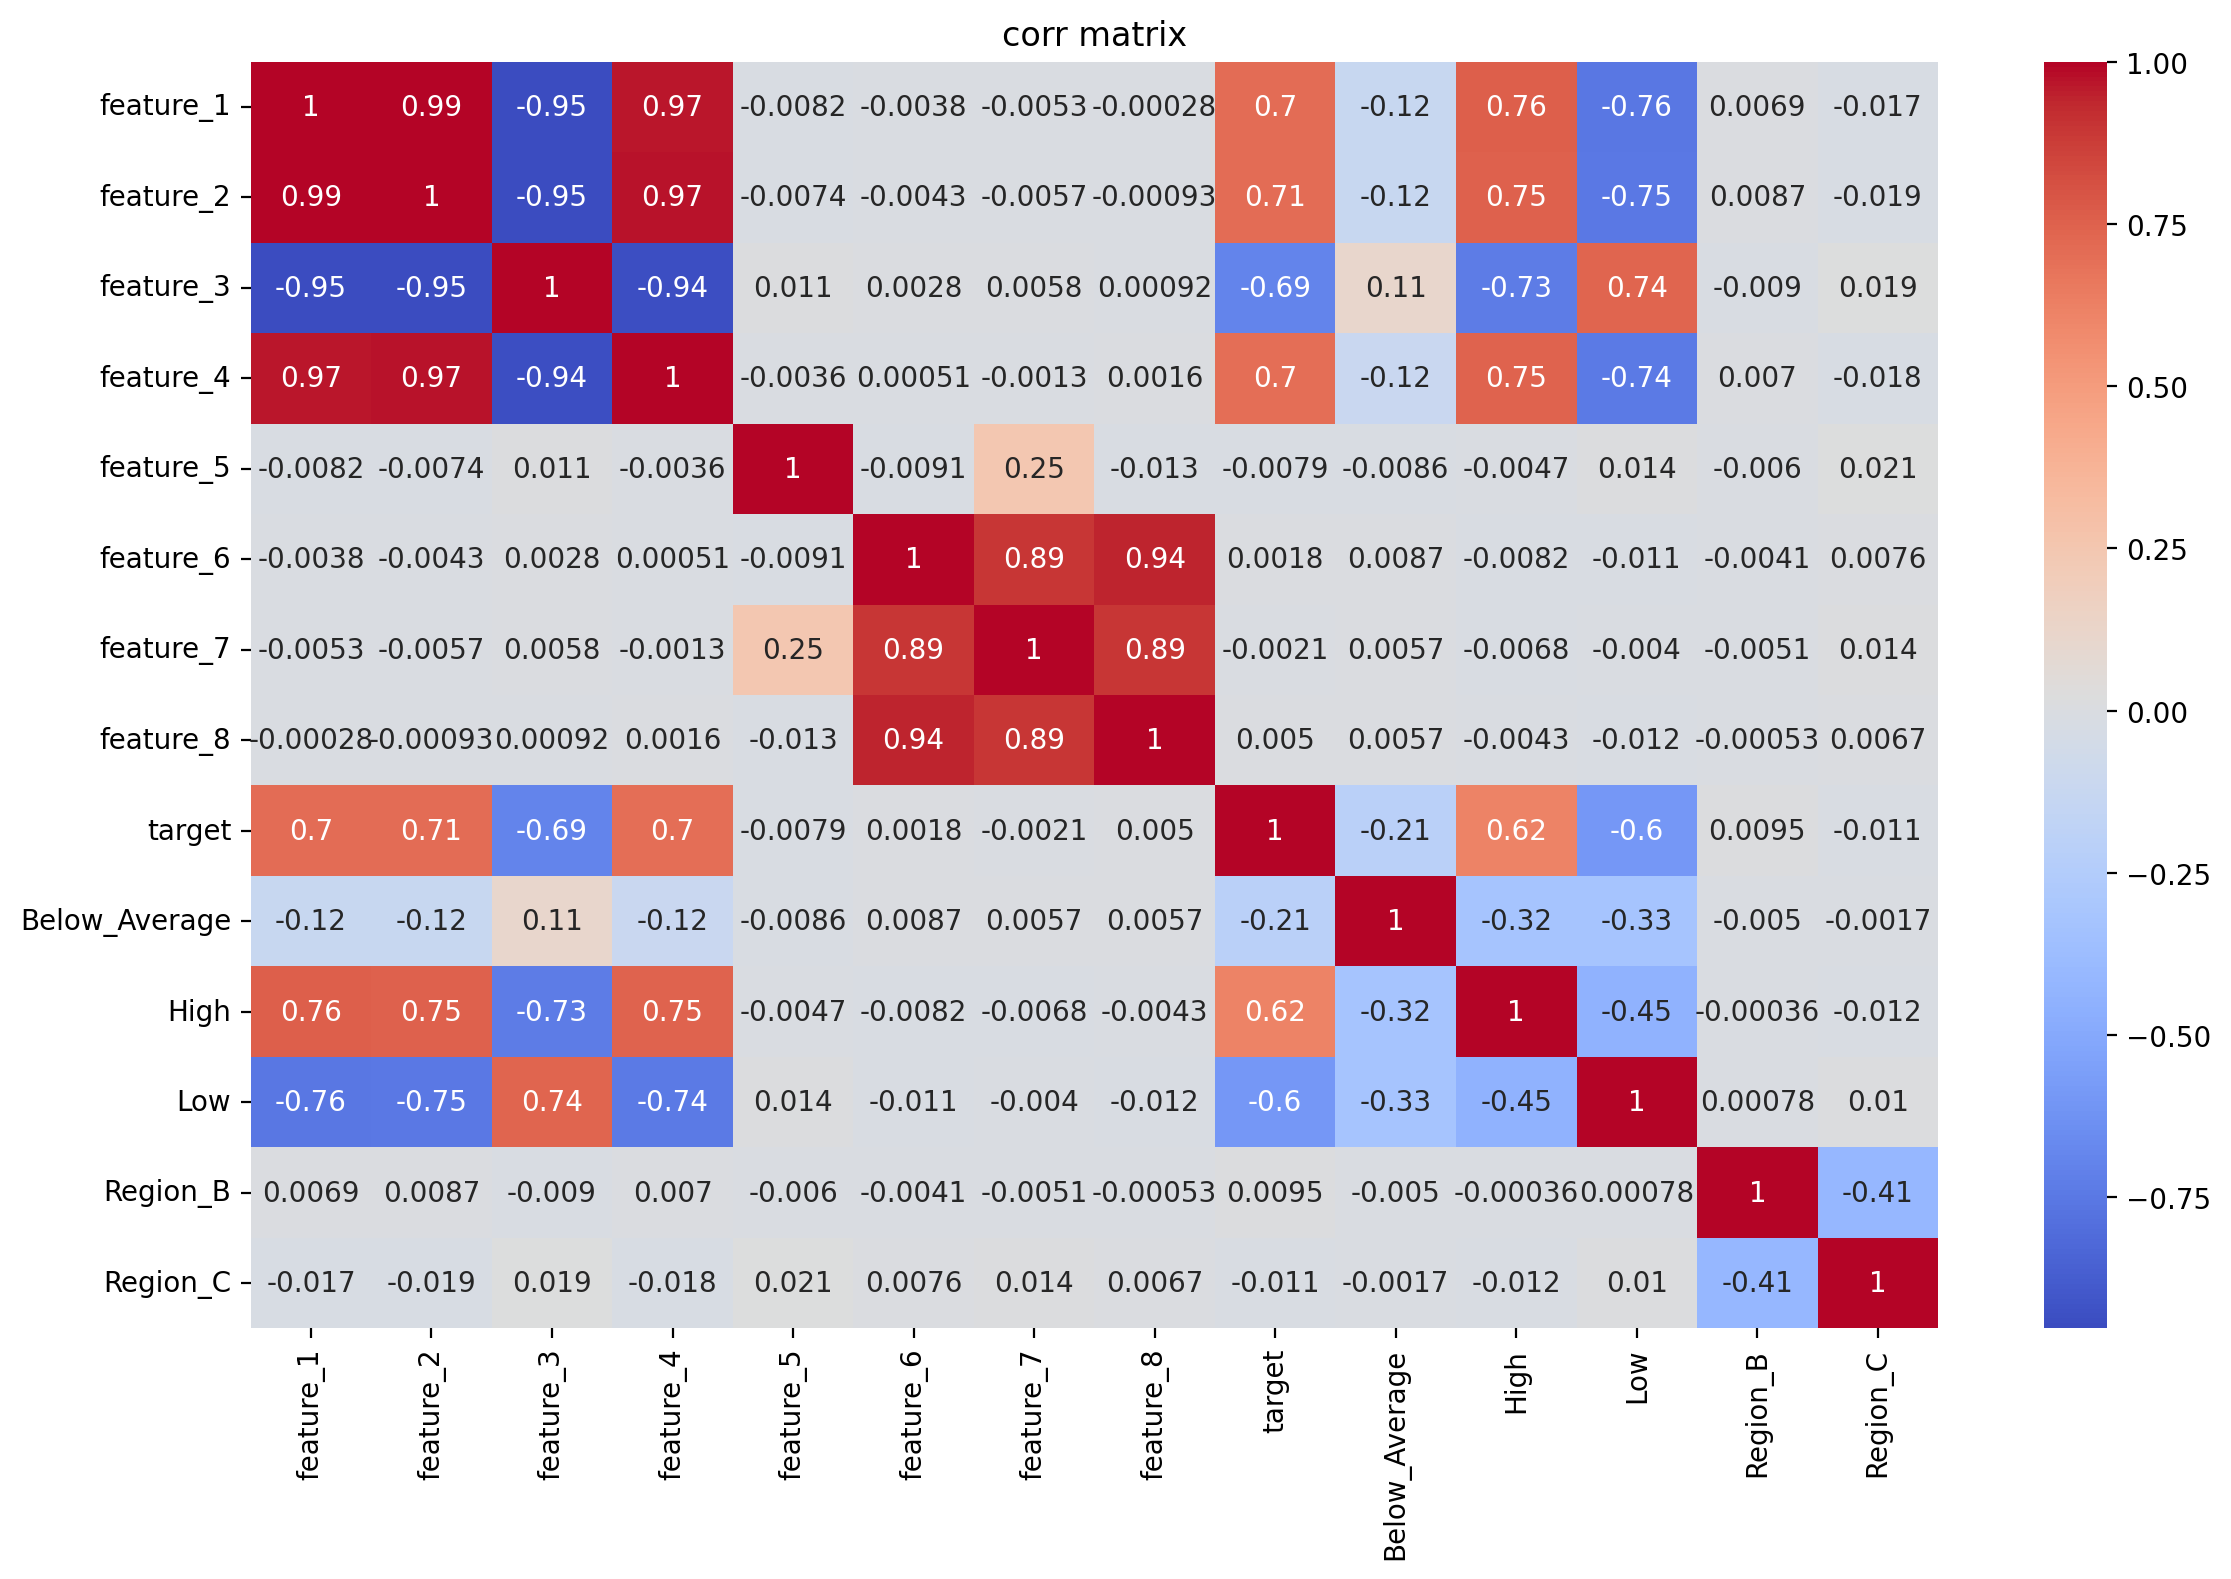

In [48]:
plt.figure(figsize=(12, 8), dpi=200)
sb.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("corr matrix")
plt.tight_layout()
plt.show()

In [67]:
df_encoded = df_encoded.drop(columns=['feature_2','feature_3','feature_4','feature_7','feature_8'])

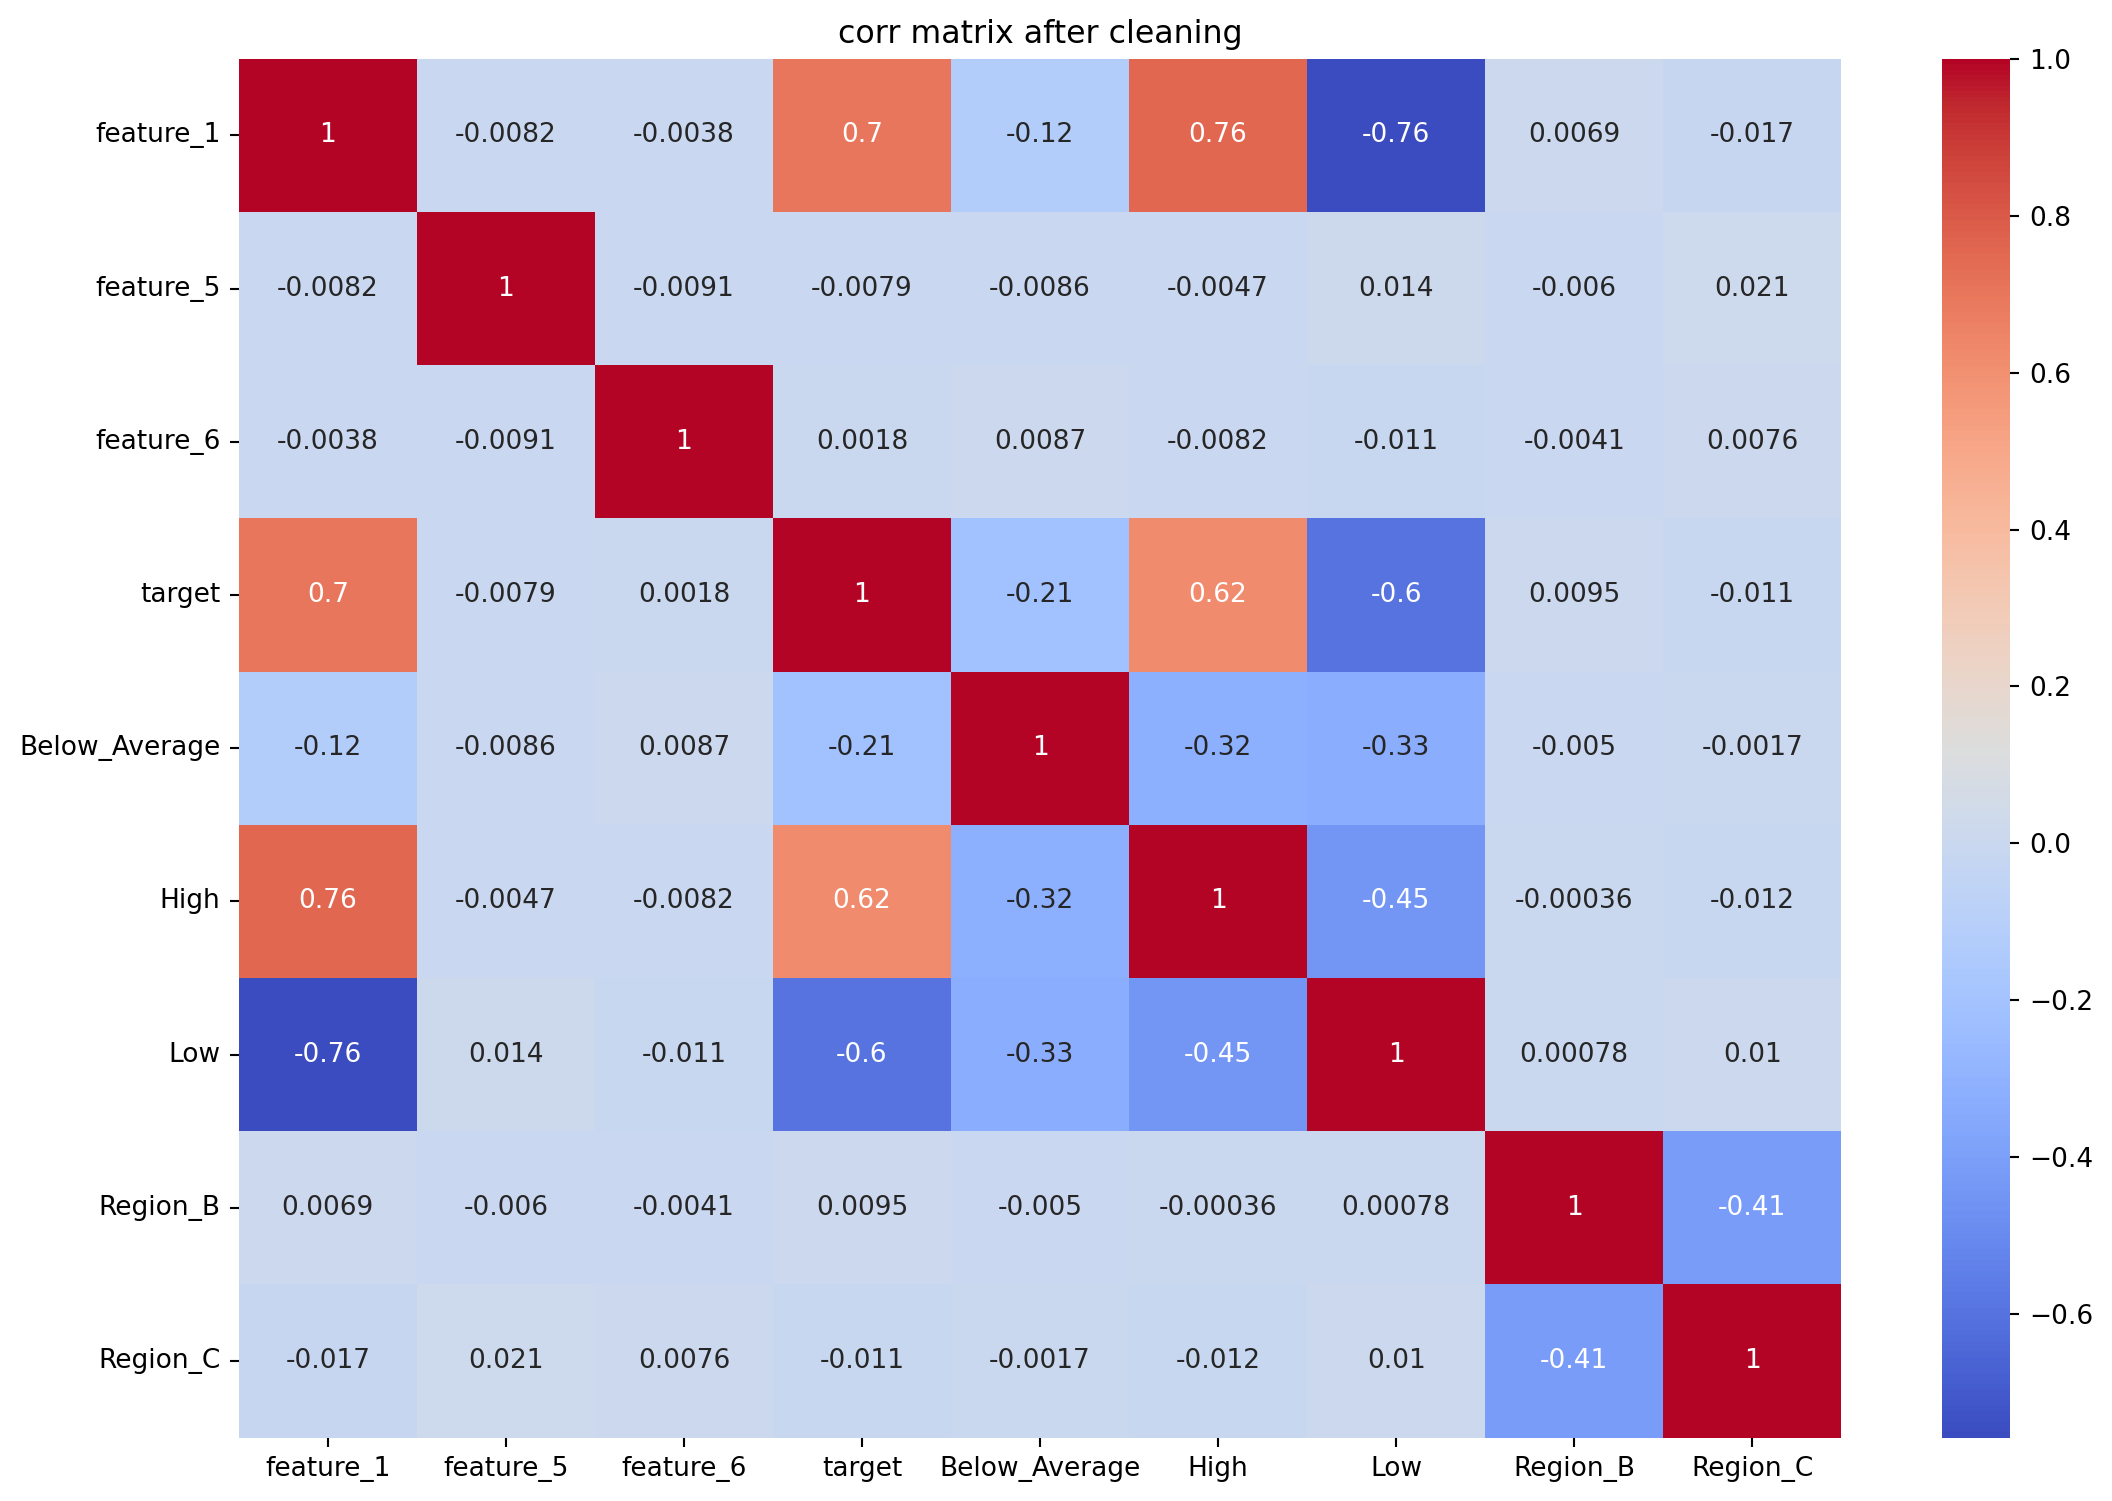

In [68]:
df_corr = df_encoded.corr()

plt.figure(figsize=(12,8), dpi=190)
sb.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title('corr matrix after cleaning')
plt.tight_layout()

In [71]:

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64']))

In [76]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [77]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # suppress warning
    'CatBoost': CatBoostClassifier(verbose=0)  # suppress training output
}


for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression: 0.8595 (+/- 0.0140)
Random Forest: 0.8592 (+/- 0.0157)
Gradient Boosting: 0.8549 (+/- 0.0185)
Decision Tree: 0.8108 (+/- 0.0170)


/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ka53/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:17:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

XGBoost: 0.8523 (+/- 0.0149)
CatBoost: 0.8591 (+/- 0.0130)


In [78]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1  
)

grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       944
           1       0.84      0.86      0.85       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800

ROC-AUC: 0.8560658561698083


<Figure size 640x480 with 0 Axes>

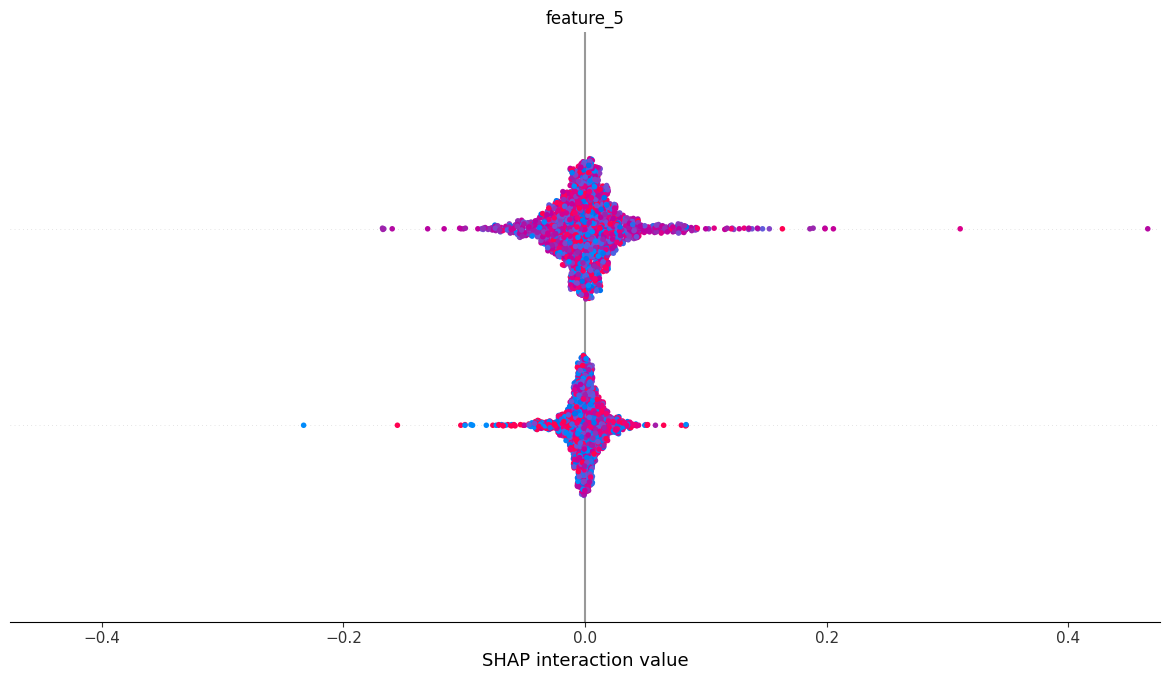

In [80]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

In [81]:
def log_metrics(model_name, params, metrics):
    log_entry = {
        'timestamp': datetime.now().isoformat(),
        'model': model_name,
        'parameters': params,
        'metrics': metrics
    }
    

metrics = {
    'accuracy': 0.85,
    'roc_auc': 0.91,
    'f1_score': 0.85
}
log_metrics('RandomForest', {'n_estimators': 100}, metrics)

### logistic regression & decision tree

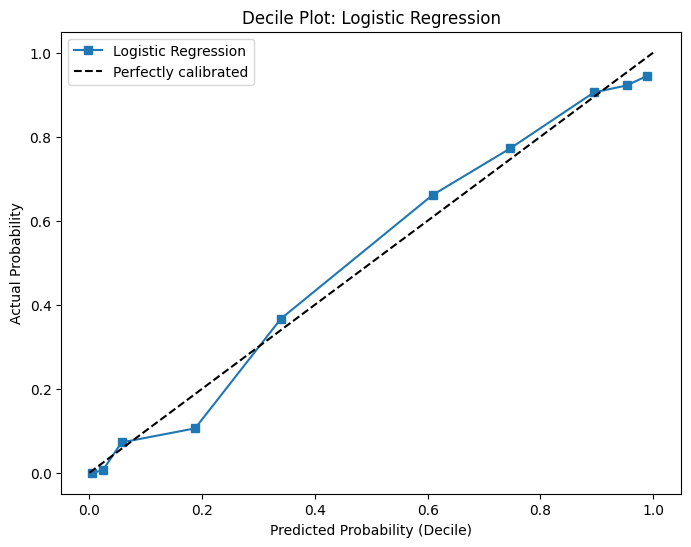

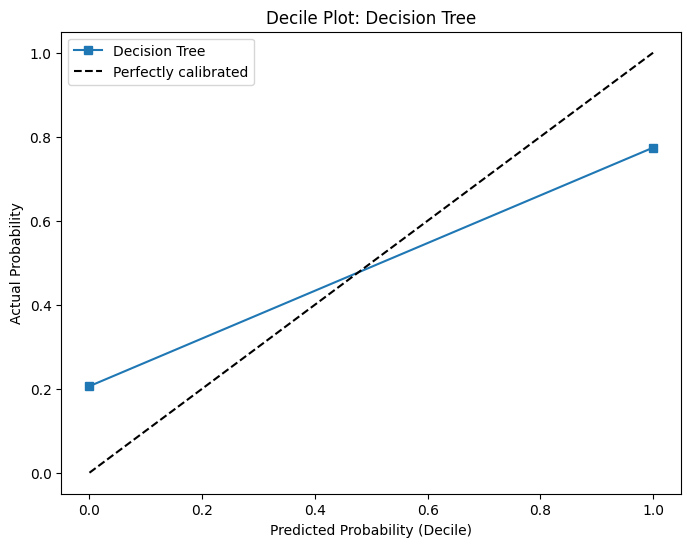

In [82]:
def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()

lr = LogisticRegression().fit(X_train, y_train)
plot_decile_curve(y_test, lr.predict_proba(X_test)[:,1], 'Logistic Regression')

dt = DecisionTreeClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, dt.predict_proba(X_test)[:,1], 'Decision Tree')


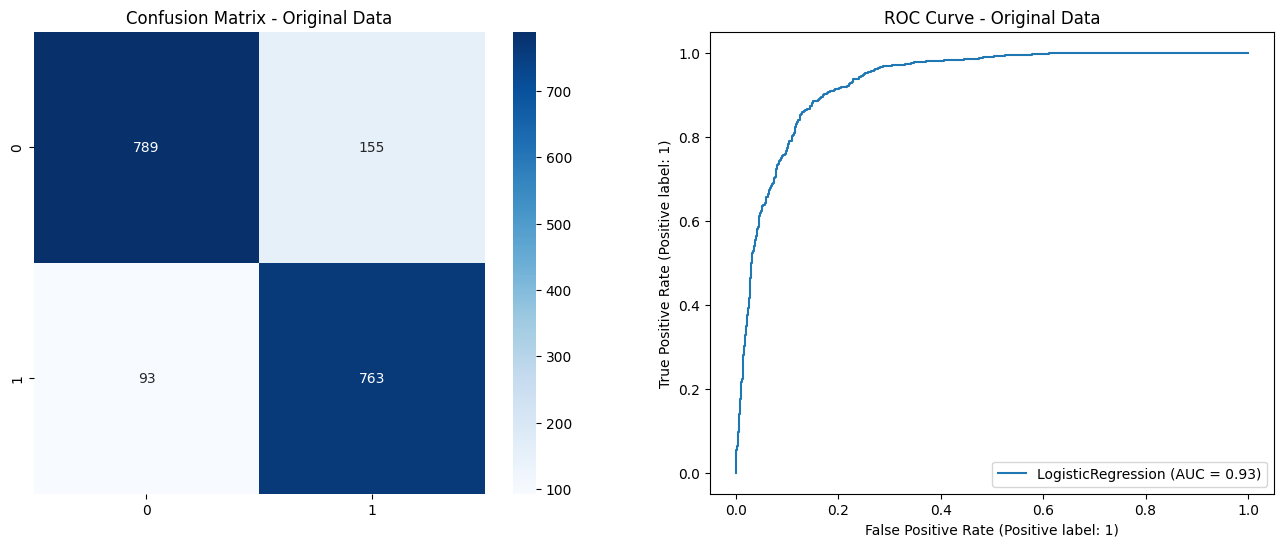

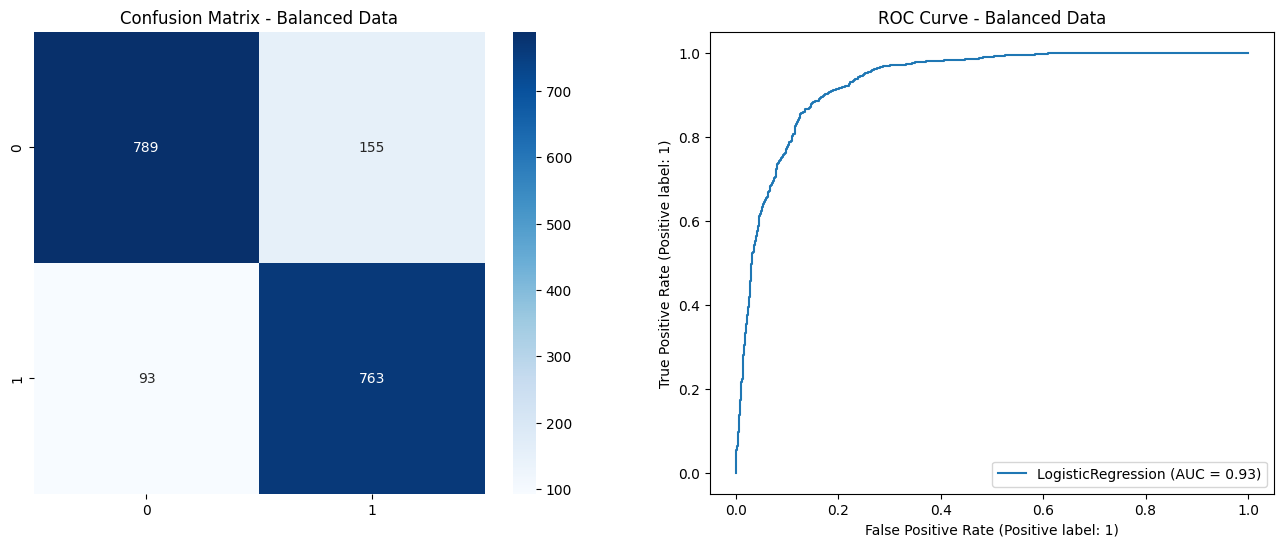

In [83]:
def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(lr, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
lr_balanced = LogisticRegression().fit(X_res, y_res)
plot_confusion_roc(lr_balanced, X_test, y_test, 'Balanced Data')

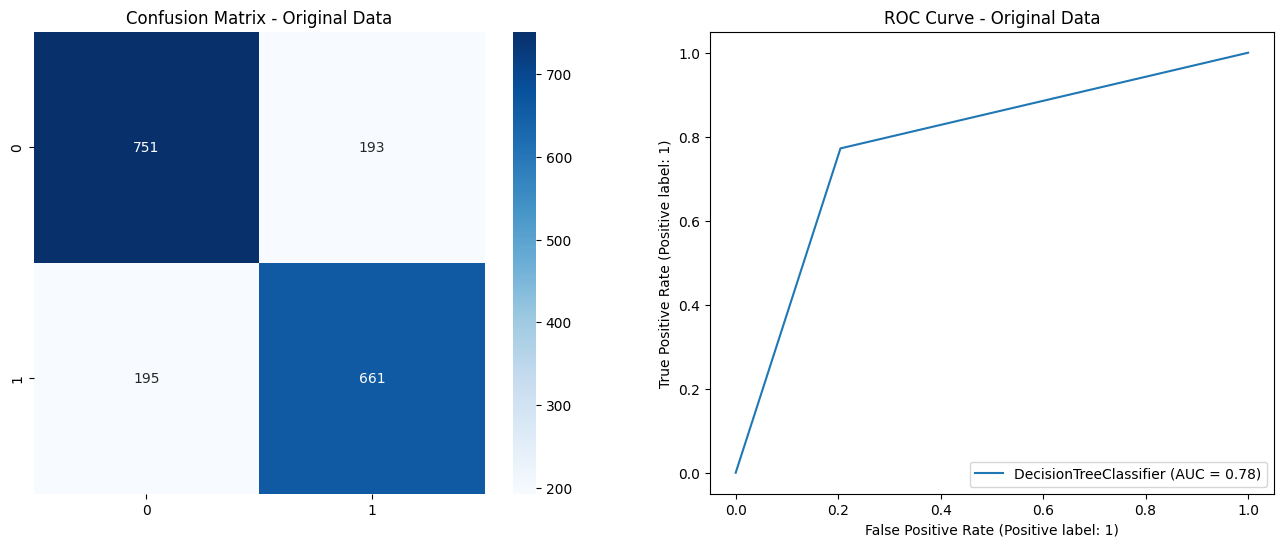

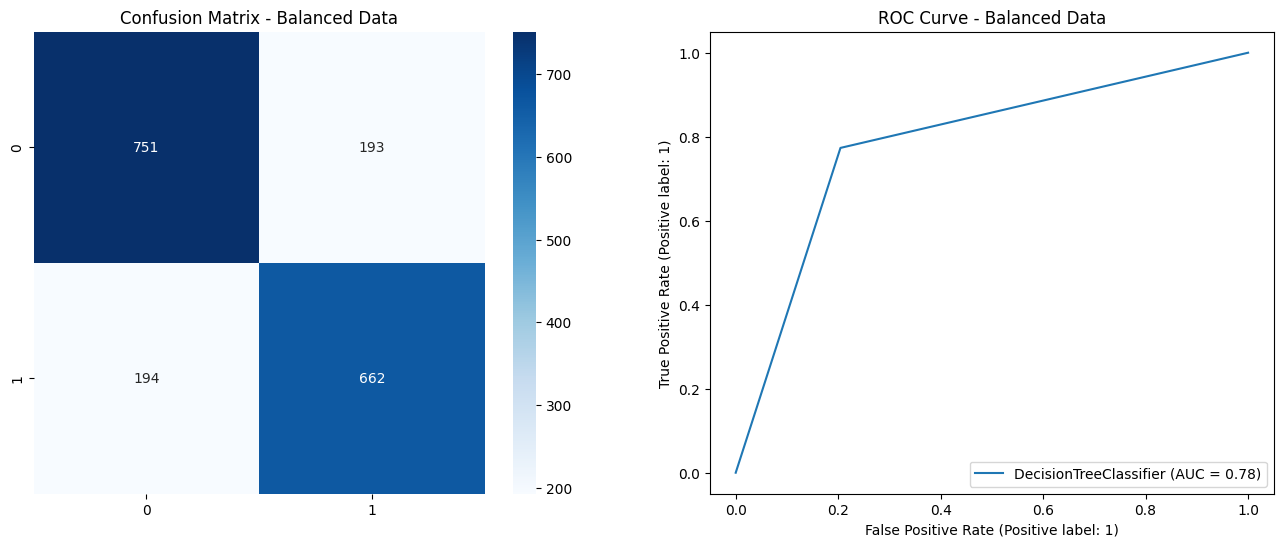

In [86]:
def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(dt, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
dt_balanced = DecisionTreeClassifier().fit(X_res, y_res)
plot_confusion_roc(dt_balanced, X_test, y_test, 'Balanced Data')

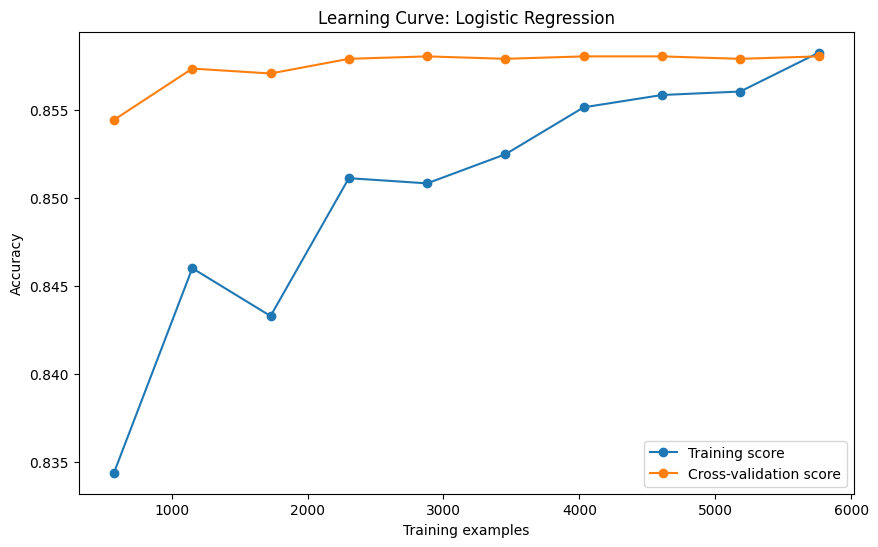

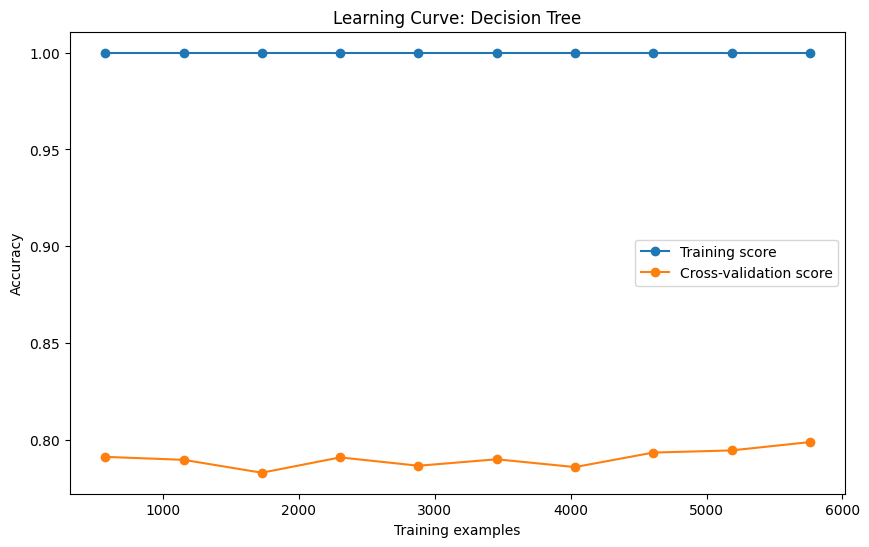

In [84]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(lr, X_train, y_train, 'Logistic Regression')
plot_learning_curve(dt, X_train, y_train, 'Decision Tree') 

#### random fores & gradient boosting 

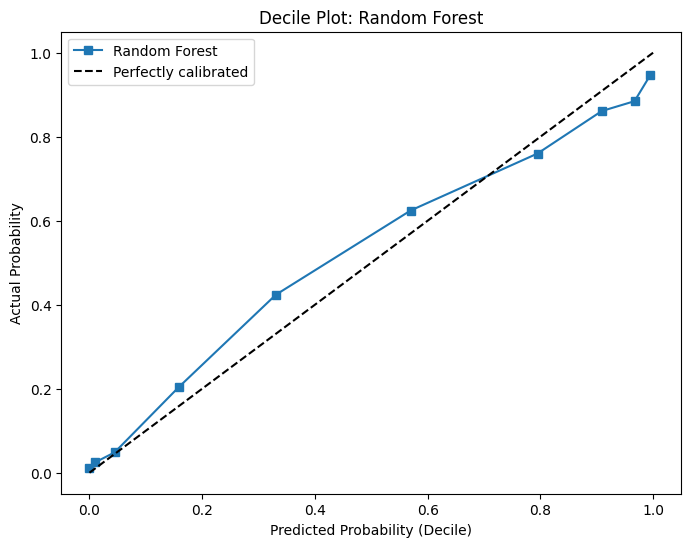

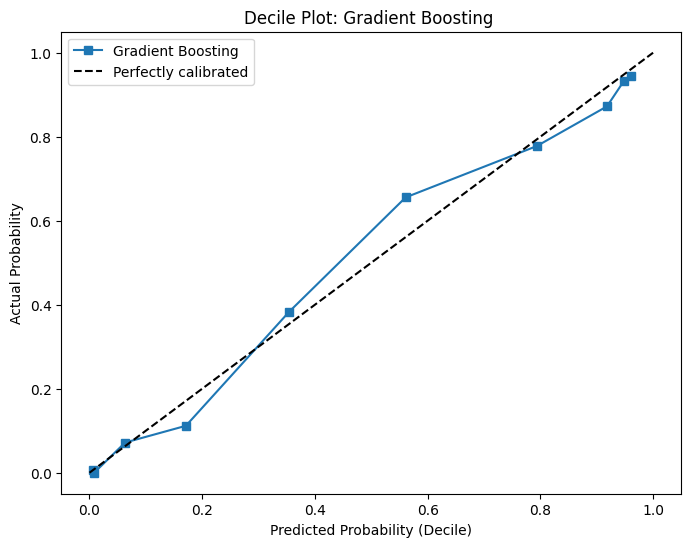

In [87]:
def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()

rf = RandomForestClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, rf.predict_proba(X_test)[:,1], 'Random Forest')

gb = GradientBoostingClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, gb.predict_proba(X_test)[:,1], 'Gradient Boosting ')

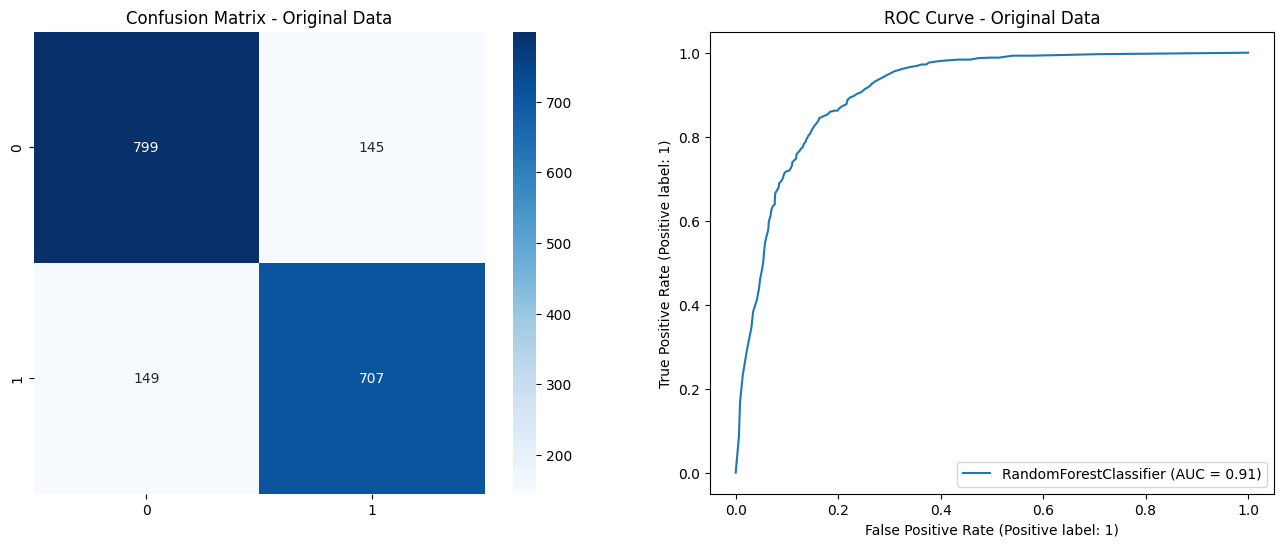

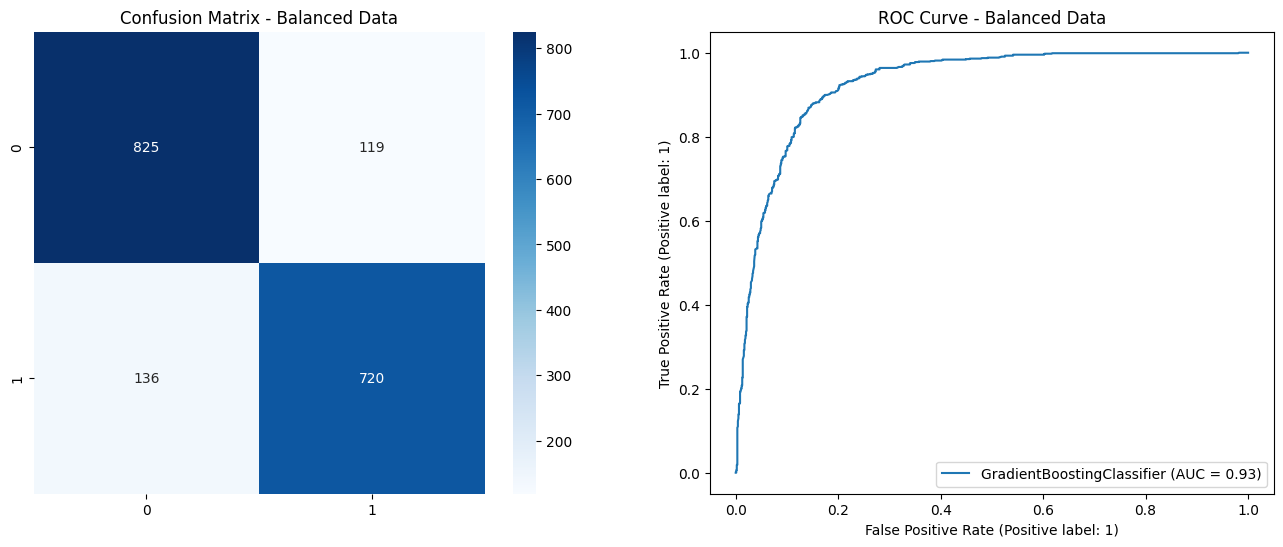

In [88]:

def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(rf, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
lf_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(lf_balanced, X_test, y_test, 'Balanced Data')



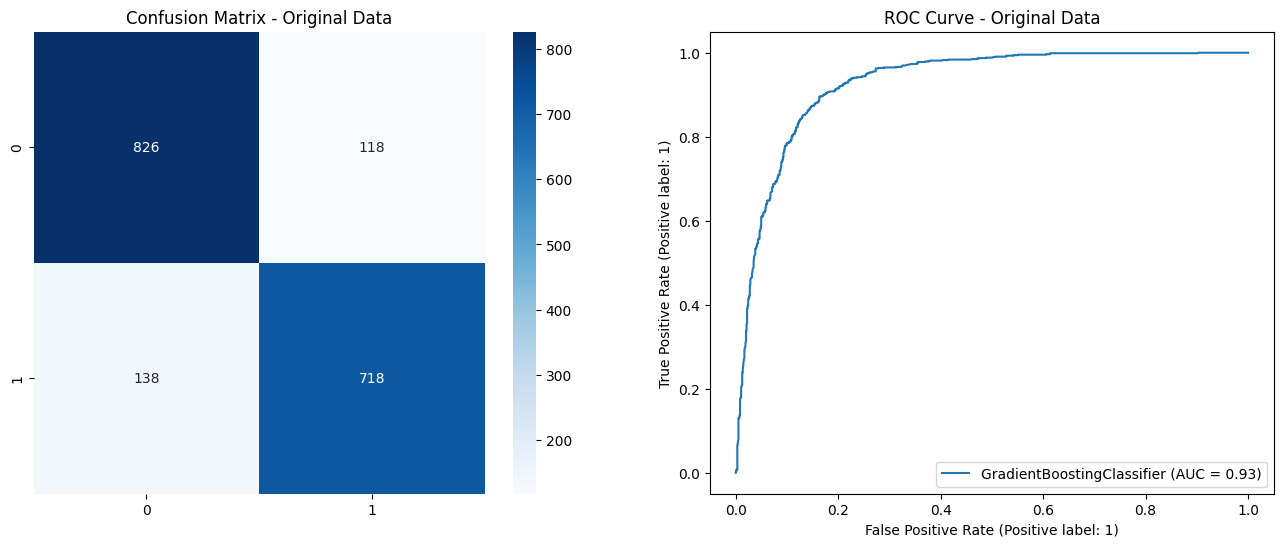

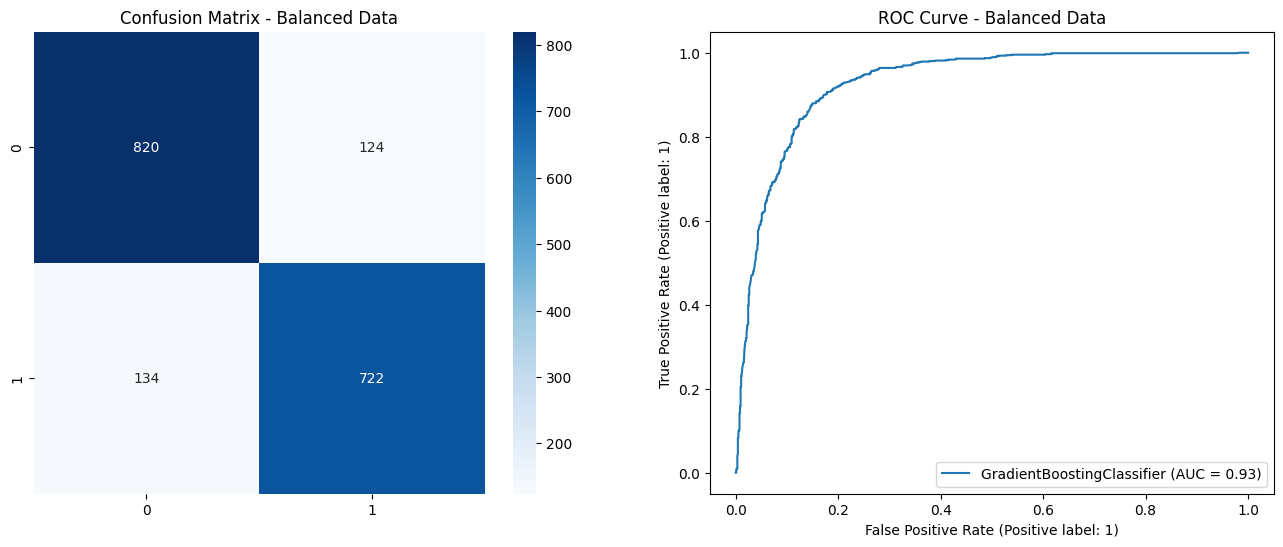

In [89]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(gb, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
gb_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(gb_balanced, X_test, y_test, 'Balanced Data')



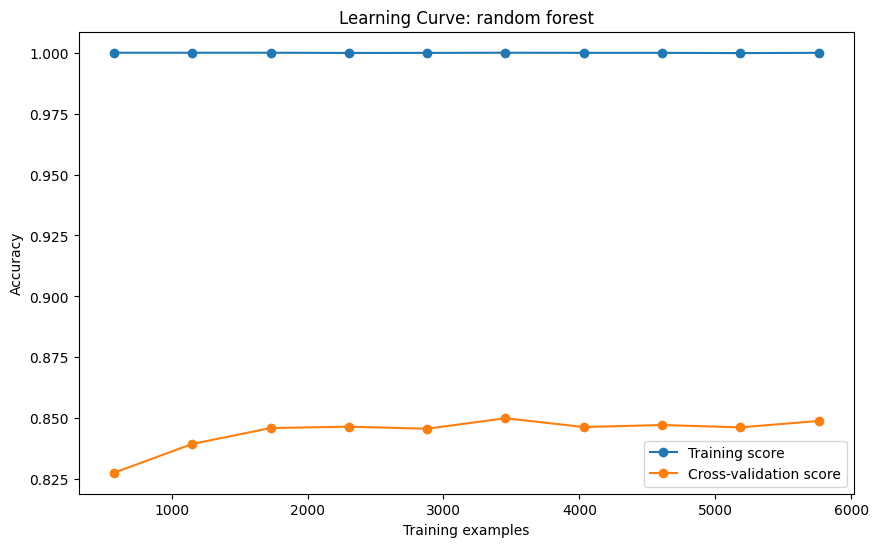

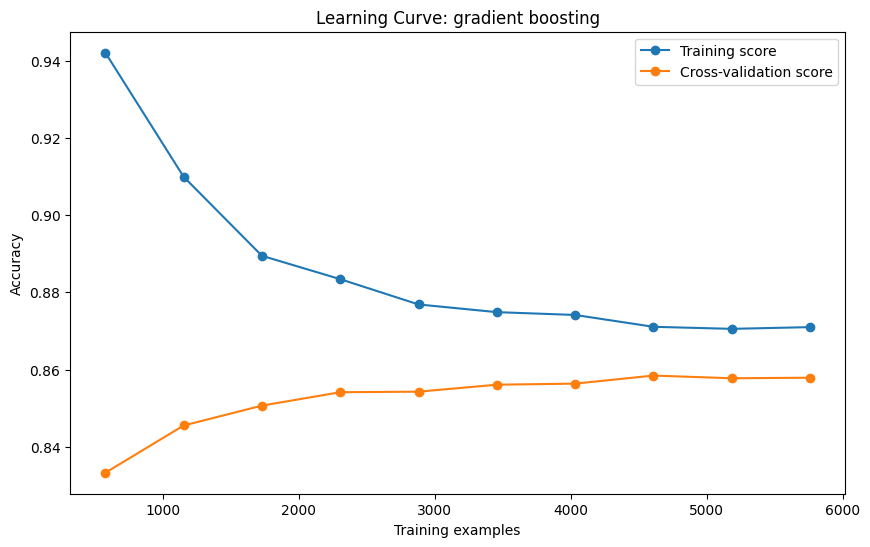

In [91]:

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(rf, X_train, y_train, 'random forest')
plot_learning_curve(gb, X_train, y_train, 'gradient boosting') 

#### knn * GaussianNB



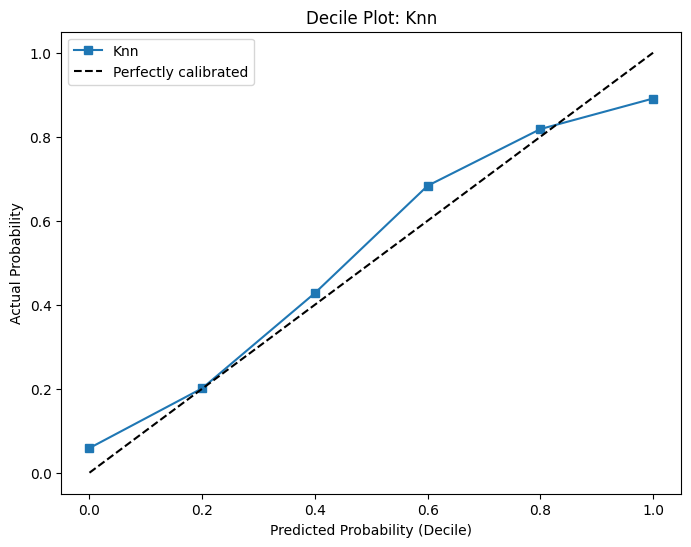

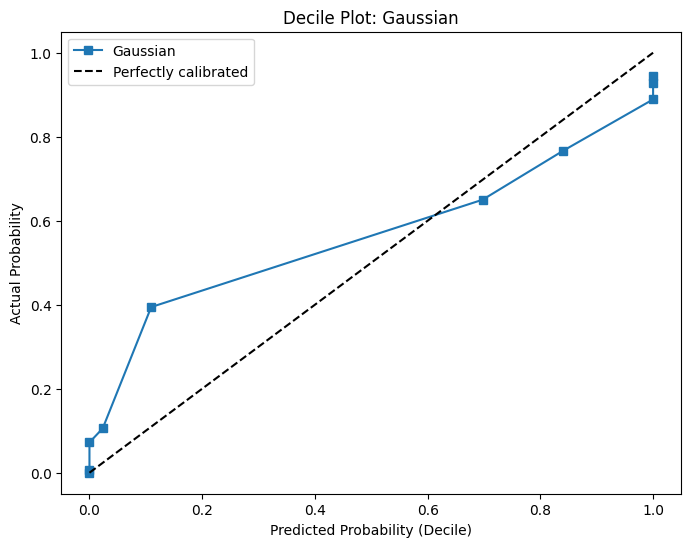

In [ ]:

def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()




knn = KNeighborsClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, knn.predict_proba(X_test)[:,1], 'Knn')



g = GaussianNB().fit(X_train, y_train)
plot_decile_curve(y_test, g.predict_proba(X_test)[:,1], 'Gaussian')

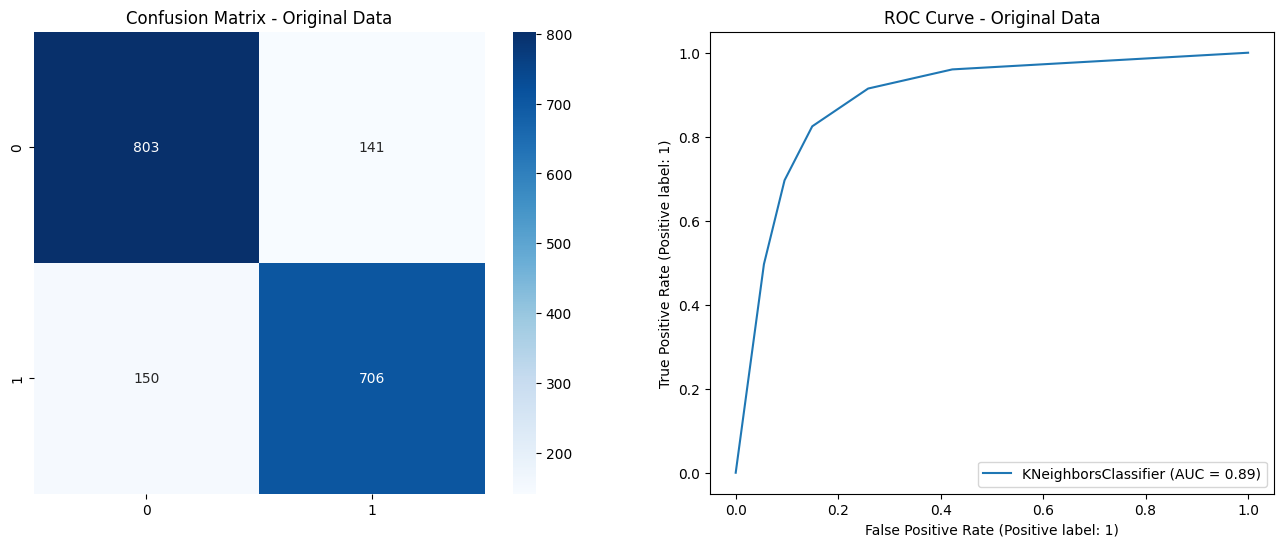

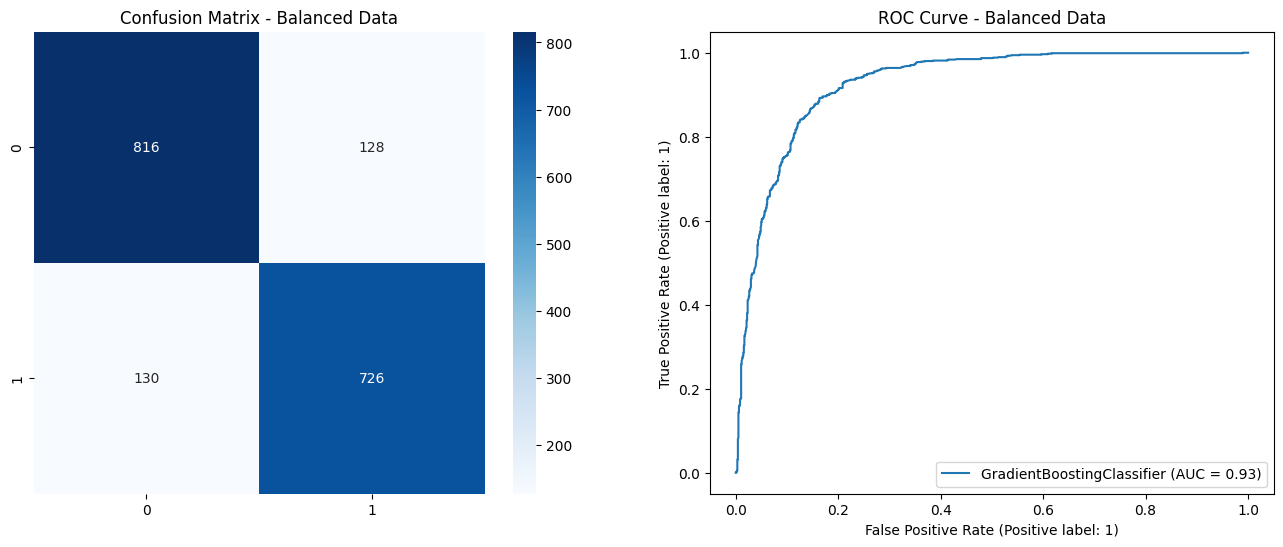

In [97]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(knn, X_test, y_test, 'Original Data')


smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
knn_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(knn_balanced, X_test, y_test, 'Balanced Data')



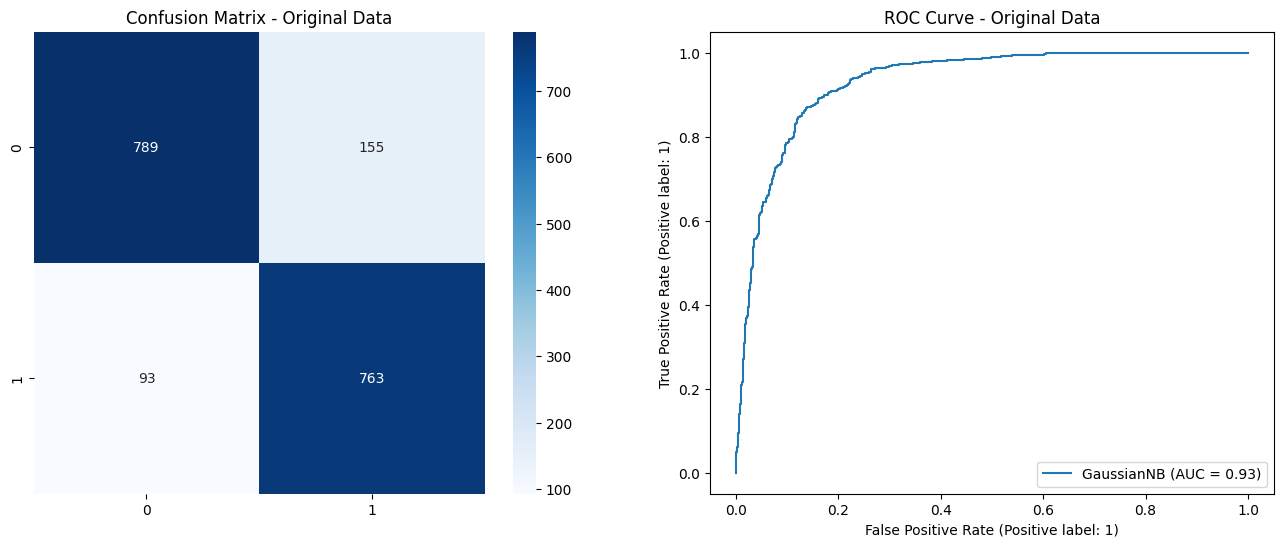

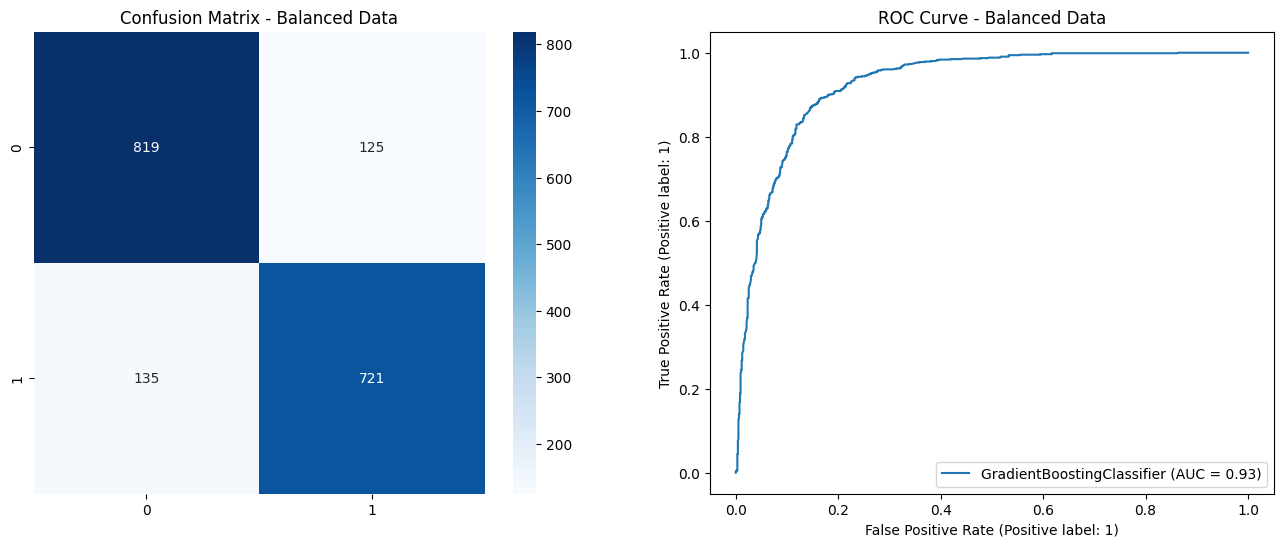

In [98]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(g, X_test, y_test, 'Original Data')


smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
g_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(g_balanced, X_test, y_test, 'Balanced Data')



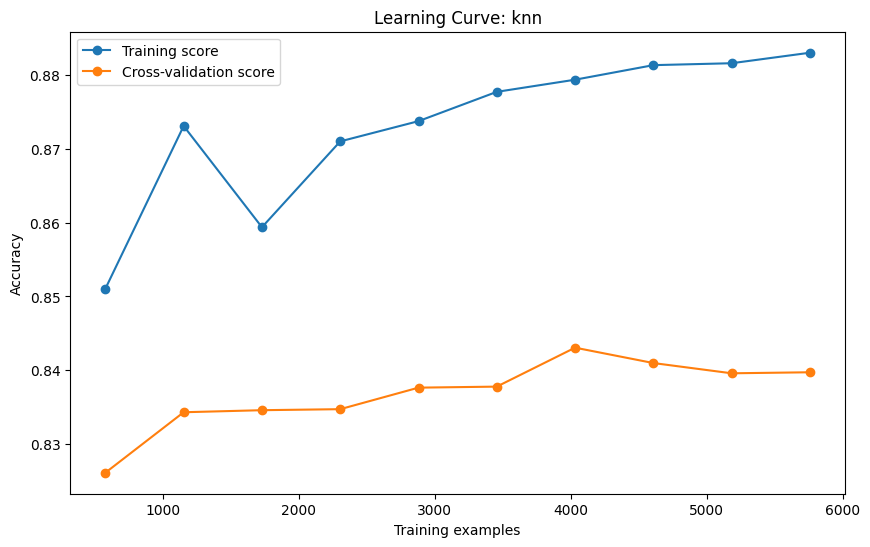

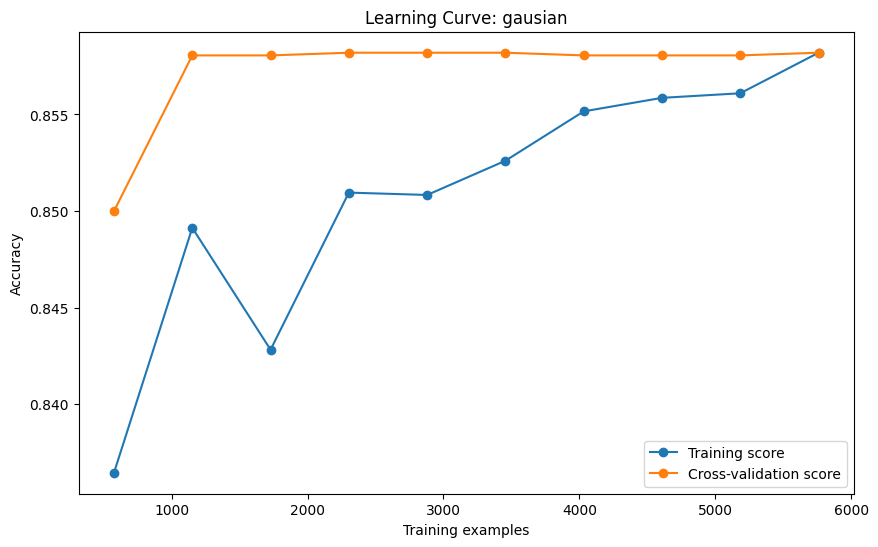

In [99]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve: {model_name}')
    plt.legend()
    plt.show()

plot_learning_curve(knn, X_train, y_train, 'knn')
plot_learning_curve(g, X_train, y_train, 'gausian') 

In [100]:
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import ExtraTreesClassifier



#### mlp & extratrees

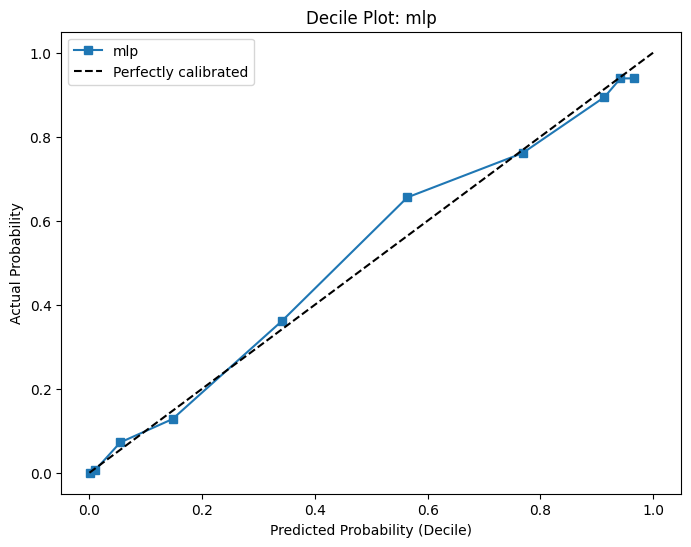

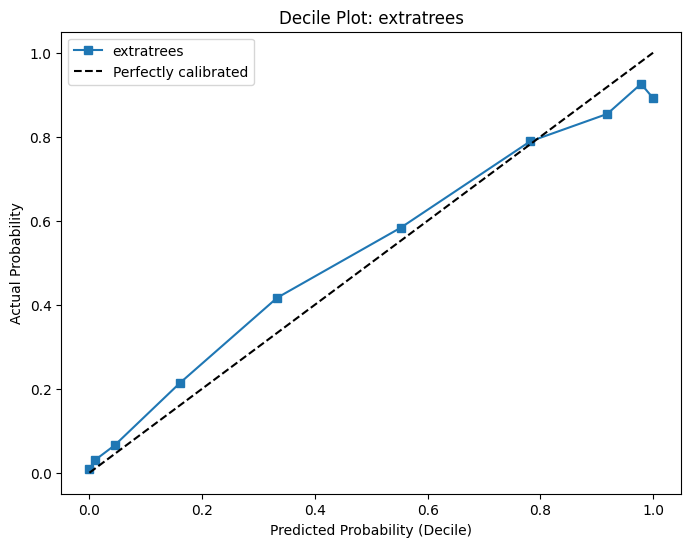

In [101]:


def plot_decile_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy='quantile')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 's-', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Predicted Probability (Decile)')
    plt.ylabel('Actual Probability')
    plt.title(f'Decile Plot: {model_name}')
    plt.legend()
    plt.show()





mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300).fit(X_train, y_train)
plot_decile_curve(y_test, mlp.predict_proba(X_test)[:,1], 'mlp')


et = ExtraTreesClassifier().fit(X_train, y_train)
plot_decile_curve(y_test, et.predict_proba(X_test)[:,1], 'extratrees')


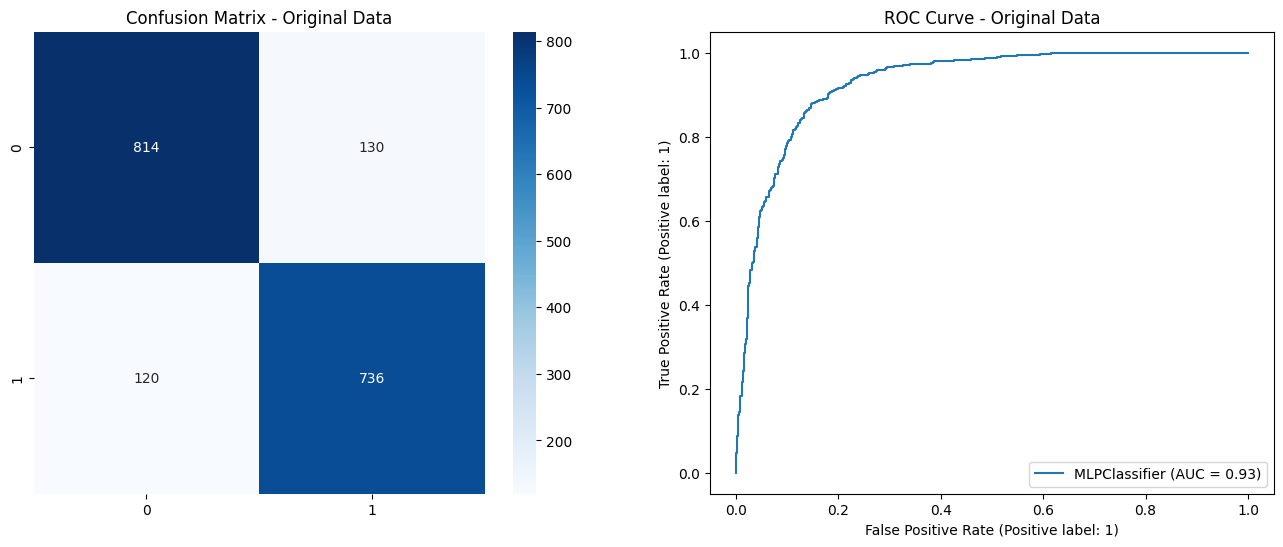

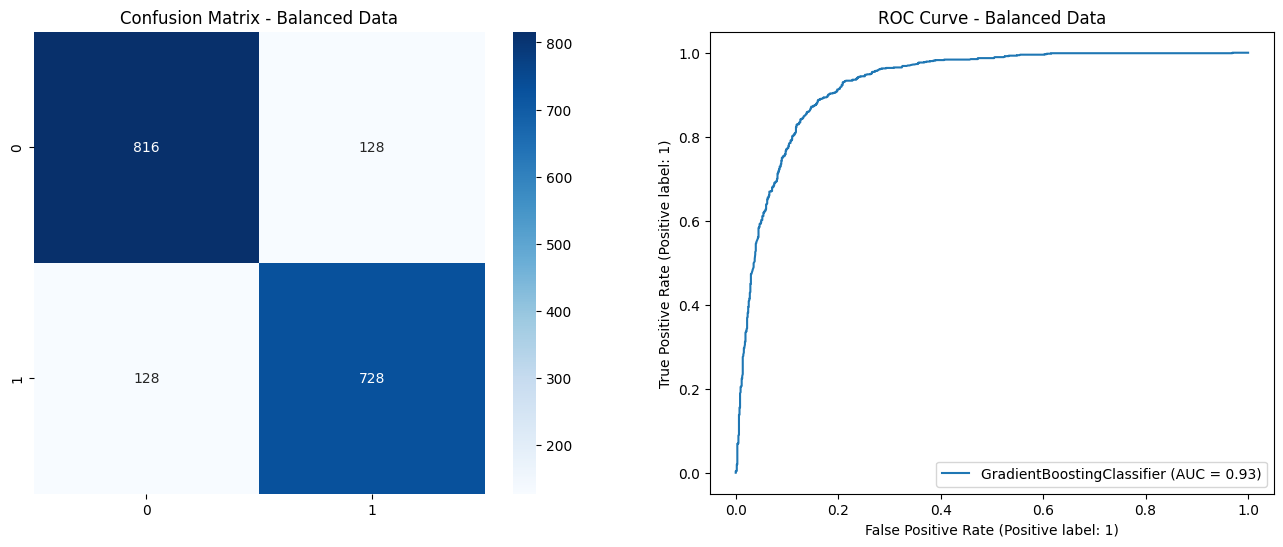

In [102]:

def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(mlp, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
mlp_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(mlp_balanced, X_test, y_test, 'Balanced Data')



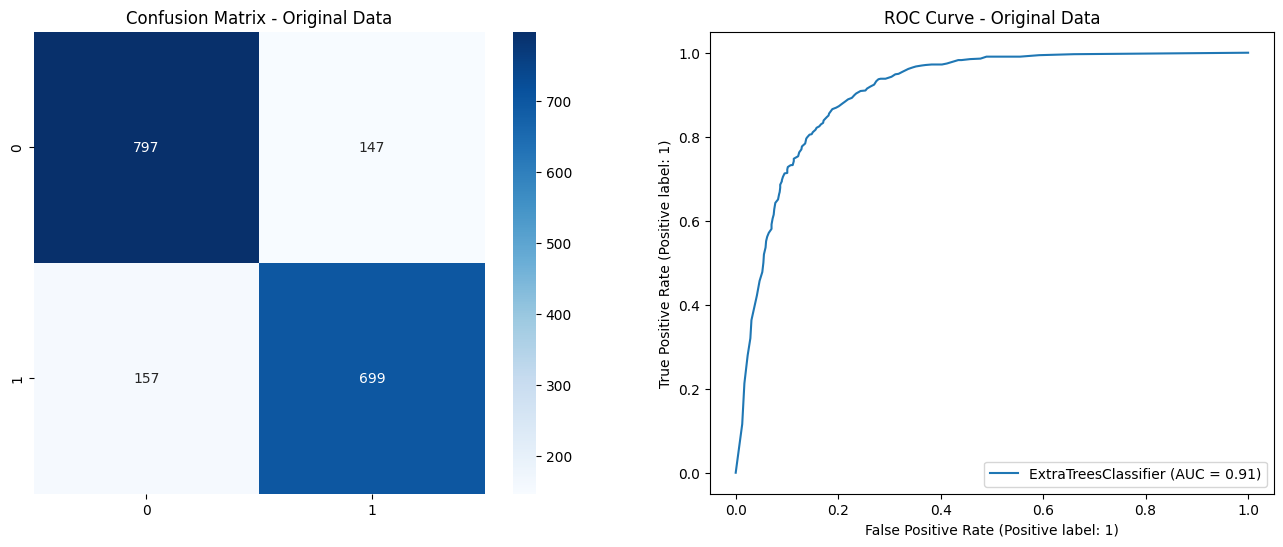

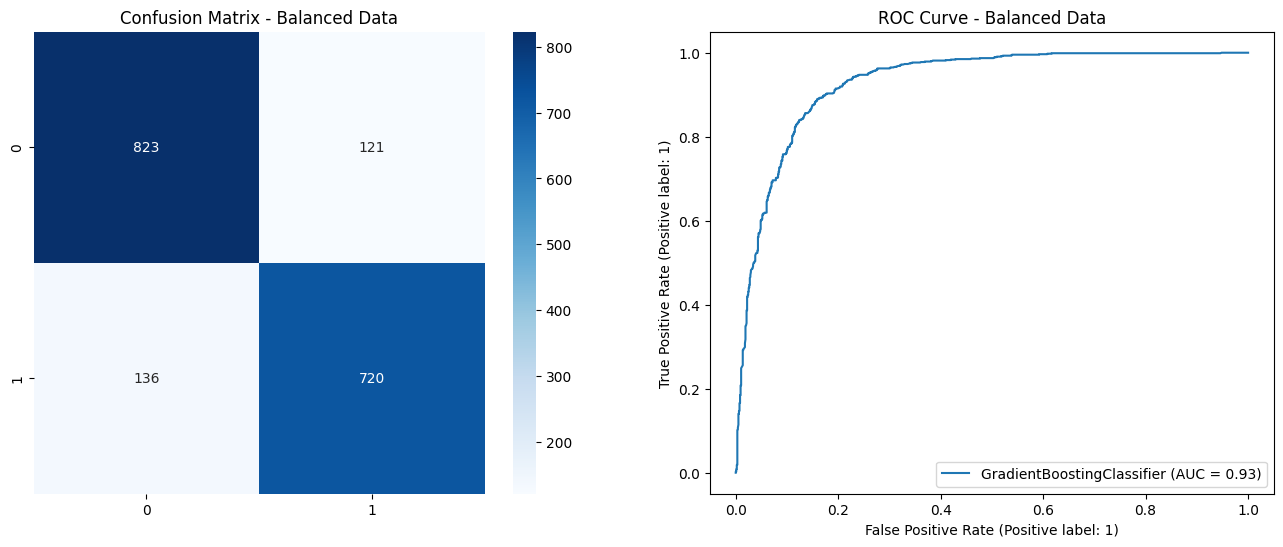

In [103]:


def plot_confusion_roc(model, X, y, case_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Confusion Matrix
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'Confusion Matrix - {case_name}')
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X, y, ax=ax2)
    ax2.set_title(f'ROC Curve - {case_name}')
    plt.show()

# Первый случай (например, до балансировки)
plot_confusion_roc(et, X_test, y_test, 'Original Data')

# Второй случай (после балансировки)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
et_balanced = GradientBoostingClassifier().fit(X_res, y_res)
plot_confusion_roc(et_balanced, X_test, y_test, 'Balanced Data')

